In [115]:
import pandas as pd
import numpy as np

In [116]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [117]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [118]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [119]:
df=pd.read_csv('data_perovskites.csv')

In [120]:
new_data=pd.read_csv('rhombohedral.csv')

In [121]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [122]:
wp1=df.drop(['Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [123]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [124]:
wp1['Lowest distortion'].value_counts().sum()

5276

In [125]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [126]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [127]:
wp1=wp1[(wp1['Goldschmidt Tolerance'] >= 0.82) & (wp1['Goldschmidt Tolerance'] <= 1.1)]

In [128]:
wp1=wp1[(wp1['Octahedral factor'] >= 0.414) & (wp1['Octahedral factor'] <= 0.732)]

In [129]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Goldschmidt Tolerance,Octahedral factor
12,AcCoO3,Ac,Co,False,element not in BV,element not in BV,1.12,0.63,rhombohedral,-2.43,0.877788,0.450000
13,AcCrO3,Ac,Cr,False,element not in BV,element not in BV,1.12,0.58,orthorhombic,-3.14,0.899954,0.414286
15,AcCuO3,Ac,Cu,False,element not in BV,element not in BV,1.12,0.68,orthorhombic,-2.24,0.856687,0.485714
19,AcFeO3,Ac,Fe,False,element not in BV,element not in BV,1.12,0.67,orthorhombic,-2.73,0.860826,0.478571
20,AcGaO3,Ac,Ga,False,element not in BV,element not in BV,1.12,0.62,orthorhombic,-2.91,0.882133,0.442857
...,...,...,...,...,...,...,...,...,...,...,...,...
5173,YbTiO3,Yb,Ti,True,2,4,1.14,0.61,orthorhombic,-3.53,0.893558,0.435714
5177,YbVO3,Yb,V,True,2,4,1.14,0.58,orthorhombic,-3.07,0.907097,0.414286
5178,YbWO3,Yb,W,False,2,4,1.14,0.66,orthorhombic,-2.73,0.871870,0.471429
5182,YbZrO3,Yb,Zr,False,2,4,1.14,0.72,orthorhombic,-3.66,0.847194,0.514286


In [130]:
wp1['Lowest distortion'].value_counts()* 100/1251

orthorhombic    52.757794
cubic           37.889688
rhombohedral     6.155076
tetragonal       3.197442
Name: Lowest distortion, dtype: float64

In [131]:
wp1=wp1[wp1['Valence A']!='not balanced']

In [132]:
wp1=wp1[wp1['Valence A']!='element not in BV']

In [133]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Goldschmidt Tolerance,Octahedral factor
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,-0.82,0.877336,0.542857
107,AgMoO3,Ag,Mo,False,1,5,1.28,0.61,cubic,-1.55,0.942809,0.435714
109,AgNbO3,Ag,Nb,True,1,5,1.28,0.64,rhombohedral,-2.01,0.928944,0.457143
122,AgReO3,Ag,Re,False,1,5,1.28,0.58,cubic,-1.22,0.957094,0.414286
125,AgSbO3,Ag,Sb,True,1,5,1.28,0.60,orthorhombic,-1.16,0.947523,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...
5173,YbTiO3,Yb,Ti,True,2,4,1.14,0.61,orthorhombic,-3.53,0.893558,0.435714
5177,YbVO3,Yb,V,True,2,4,1.14,0.58,orthorhombic,-3.07,0.907097,0.414286
5178,YbWO3,Yb,W,False,2,4,1.14,0.66,orthorhombic,-2.73,0.871870,0.471429
5182,YbZrO3,Yb,Zr,False,2,4,1.14,0.72,orthorhombic,-3.66,0.847194,0.514286


In [134]:
wp1= pd.concat([wp1,pd.get_dummies(wp1['Valence A'])],axis=1)

In [135]:
wp1['Valence A']=pd.to_numeric(wp1['Valence A'],downcast='float')
wp1['Valence B']=pd.to_numeric(wp1['Valence B'],downcast='float')

In [136]:
wp1['Valence A'].value_counts()

2.0    298
3.0    280
1.0     71
4.0     26
Name: Valence A, dtype: int64

In [137]:
wp1['rA/rB']=wp1['Radius A [ang]']/wp1['Radius B [ang]']

In [138]:
wp1['ln rA/rB']=np.log(wp1['rA/rB'])

In [139]:
wp1['rA/rB'].describe()

count    675.000000
mean       1.846269
std        0.307426
min        1.387755
25%        1.586853
50%        1.776316
75%        2.053640
max        2.827586
Name: rA/rB, dtype: float64

In [140]:
wp1['tN']=(1.4/wp1['Radius B [ang]'])-wp1['Valence A']*(wp1['Valence A']-(wp1['rA/rB']/wp1['ln rA/rB']))

In [141]:
wp1['tN'].describe()

count    675.000000
mean       3.468194
std        1.289246
min       -2.238066
25%        2.824026
50%        3.821751
75%        4.229004
max        5.863777
Name: tN, dtype: float64

In [142]:
new_data=new_data[new_data['Valence A']!='not balanced']
new_data=new_data[new_data['Valence A']!='element not in BV']

In [143]:
new_data

,ABO3,A,B,Valence A,Valence B,Lowest distortion,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],tG,tR,Octahedral factor,VA,VB,VA/VB
76,AgAsO3,Ag,As,1,5,tetragonal,1.28,0.95,0.46,1.018995909,0.923839,0.328571429,45.369932,8.579808,5.287989
78,AgBO3,Ag,B,3,3,cubic,0.75,0.95,0.27,0.910484547,1.358334,0.192857143,23.424975,6.209951,3.772168
81,AgBiO3,Ag,Bi,1,5,rhombohedral,1.28,0.95,0.76,0.877468699,0.911822,0.542857143,45.369932,13.436928,3.376511
86,AgCrO3,Ag,Cr,1,5,orthorhombic,1.28,0.95,0.49,1.002821371,0.921930,0.35,45.369932,9.001692,5.040156
100,AgIrO3,Ag,Ir,1,5,rhombohedral,1.28,0.95,0.57,0.96209766,0.917682,0.407142857,45.369932,10.193831,4.450725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,1,5,cubic,0.89,0.72,0.64,0.793881909,0.892546,0.457142857,28.305459,11.319552,2.500581
5319,ZrTiO3,Zr,Ti,2,4,cubic,0.89,0.72,0.61,0.805730893,0.892978,0.435714286,28.305459,10.827468,2.614227
5322,ZrUO3,Zr,U,1,5,orthorhombic,0.89,0.72,0.76,0.749777359,0.892076,0.542857143,28.305459,13.436928,2.106542
5323,ZrVO3,Zr,V,1,5,cubic,0.89,0.72,0.54,0.834803657,0.894528,0.385714286,28.305459,9.735179,2.907544


In [144]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR','VA','VB']]

In [145]:
wp1=pd.merge(wp1,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [146]:
en_bl.drop(['A','B'],axis=1)

,ABO3,EN of A,EN of B,Bond length of A,Bond length of B
0,Ac2O3,1.10,1.10,0.00000,0.000000
1,AcAgO3,1.10,1.93,0.00000,2.488353
2,AcAlO3,1.10,1.61,0.00000,1.892894
3,AcAsO3,1.10,2.18,0.00000,1.932227
4,AcAuO3,1.10,2.54,0.00000,2.313698
...,...,...,...,...,...
5324,ZrWO3,1.33,2.36,2.38342,1.745600
5325,ZrYO3,1.33,1.22,2.38342,2.235124
5326,ZrYbO3,1.33,1.10,2.38342,2.223981
5327,ZrZnO3,1.33,1.65,2.38342,2.096141


In [147]:
wp1=pd.merge(wp1,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [148]:
wp1['Lowest distortion'].value_counts()

orthorhombic    362
cubic           261
rhombohedral     33
tetragonal       19
Name: Lowest distortion, dtype: int64

In [149]:
wp1['EN diff with radius']=((wp1['Radius B [ang]']/1.4)*(wp1['EN of B']-3.44)+(wp1['Radius A [ang]']/1.4)*(wp1['EN of A']-6.88))

In [150]:
wp1

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,AgBiO3,Ag,Bi,False,1.0,5.0,1.28,0.76,rhombohedral,-0.82,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655,-5.296571
1,AgMoO3,Ag,Mo,False,1.0,5.0,1.28,0.61,cubic,-1.55,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300,-5.083429
2,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,-2.01,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,-5.366857
3,AgReO3,Ag,Re,False,1.0,5.0,1.28,0.58,cubic,-1.22,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971,-5.163714
4,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,-1.16,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,-5.121429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,-3.53,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,-5.534429
671,YbVO3,Yb,V,True,2.0,4.0,1.14,0.58,orthorhombic,-3.07,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,YbVO3,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,YbVO3,Yb,V,1.10,1.63,2.519261,1.758039,-5.456429
672,YbWO3,Yb,W,False,2.0,4.0,1.14,0.66,orthorhombic,-2.73,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,YbWO3,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,YbWO3,Yb,W,1.10,2.36,2.519261,1.745600,-5.215714
673,YbZrO3,Yb,Zr,False,2.0,4.0,1.14,0.72,orthorhombic,-3.66,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,YbZrO3,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,YbZrO3,Yb,Zr,1.10,1.33,2.519261,2.043778,-5.791714


In [151]:
wp1['1'].dtypes

dtype('uint8')

In [152]:
wp1['Formation energy [eV/atom]'].dtype

dtype('O')

In [153]:
wp1['Formation energy [eV/atom]']=pd.to_numeric(wp1['Formation energy [eV/atom]'],downcast='float')

In [154]:
wp1['Formation energy [eV/atom]'].describe()

count    675.000000
mean      -2.364119
std        0.715403
min       -3.840000
25%       -2.905000
50%       -2.370000
75%       -1.885000
max       -0.220000
Name: Formation energy [eV/atom], dtype: float64

Text(0.5, 1.0, 'Formation energy')

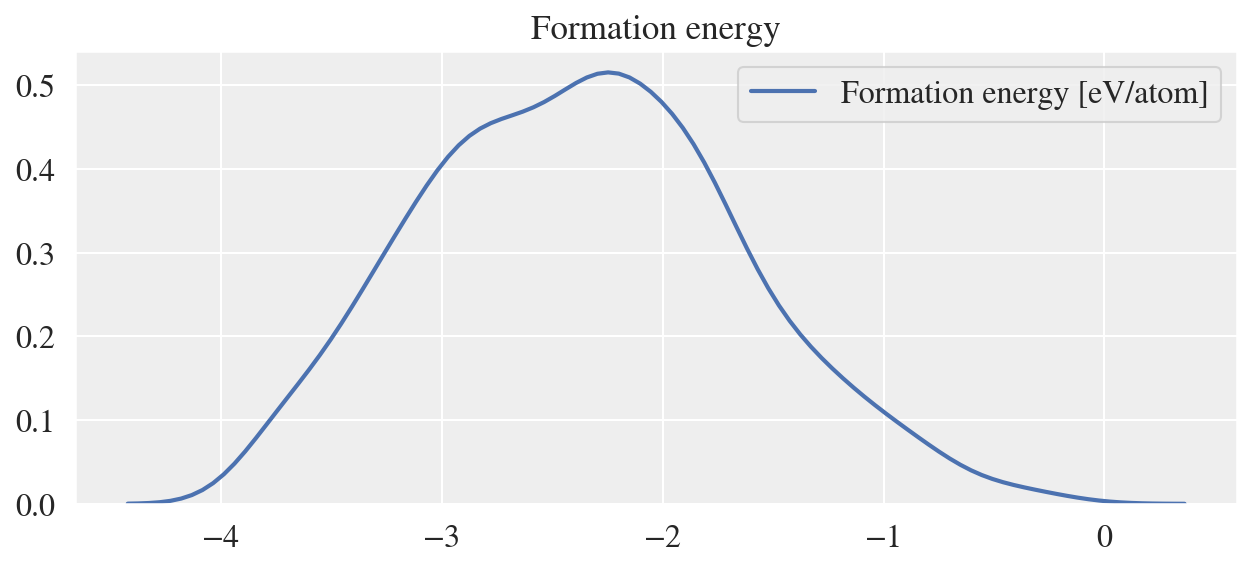

In [155]:
sns.kdeplot(wp1['Formation energy [eV/atom]'])
plt.title('Formation energy')

In [156]:
categorical = wp1.select_dtypes(include=[np.object,np.bool])

numeric = wp1.select_dtypes(include=[np.int,np.float32,np.float,np.int32,np.uint8])
numeric_cols = numeric.columns

In [157]:
categorical

,Chemical formula,A_x,B_x,In literature,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgBiO3,Ag,Bi,False,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
1,AgMoO3,Ag,Mo,False,cubic,AgMoO3,AgMoO3,Ag,Mo
2,AgNbO3,Ag,Nb,True,rhombohedral,AgNbO3,AgNbO3,Ag,Nb
3,AgReO3,Ag,Re,False,cubic,AgReO3,AgReO3,Ag,Re
4,AgSbO3,Ag,Sb,True,orthorhombic,AgSbO3,AgSbO3,Ag,Sb
...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,YbTiO3,YbTiO3,Yb,Ti
671,YbVO3,Yb,V,True,orthorhombic,YbVO3,YbVO3,Yb,V
672,YbWO3,Yb,W,False,orthorhombic,YbWO3,YbWO3,Yb,W
673,YbZrO3,Yb,Zr,False,orthorhombic,YbZrO3,YbZrO3,Yb,Zr


In [158]:
numeric

,Valence A,Valence B,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,1.0,5.0,1.28,0.76,-0.82,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,-5.296571
1,1.0,5.0,1.28,0.61,-1.55,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,1.93,2.16,2.761453,1.789300,-5.083429
2,1.0,5.0,1.28,0.64,-2.01,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,1.93,1.60,2.761453,1.955055,-5.366857
3,1.0,5.0,1.28,0.58,-1.22,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,1.93,1.90,2.761453,1.987971,-5.163714
4,1.0,5.0,1.28,0.60,-1.16,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,1.93,2.05,2.761453,2.075849,-5.121429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.61,-3.53,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,1.10,1.54,2.519261,1.927849,-5.534429
671,2.0,4.0,1.14,0.58,-3.07,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,1.10,1.63,2.519261,1.758039,-5.456429
672,2.0,4.0,1.14,0.66,-2.73,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,1.10,2.36,2.519261,1.745600,-5.215714
673,2.0,4.0,1.14,0.72,-3.66,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,1.10,1.33,2.519261,2.043778,-5.791714


In [159]:
corr = numeric.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Valence A,Valence B,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
Valence A,1.00,-1.00,-0.31,0.12,-0.21,-0.35,0.12,-0.58,-0.58,0.81,0.36,-0.34,-0.34,-0.68,-0.31,-0.32,0.12,-0.35,-0.01,-0.31,0.12,0.06,-0.05,-0.22,0.04,0.18
Valence B,-1.00,1.00,0.31,-0.12,0.21,0.35,-0.12,0.58,0.58,-0.81,-0.36,0.34,0.34,0.68,0.31,0.32,-0.12,0.35,0.01,0.31,-0.12,-0.06,0.05,0.22,-0.04,-0.18
Radius A [ang],-0.31,0.31,1.00,0.32,-0.09,0.72,0.32,0.12,0.26,-0.32,-0.05,0.55,0.55,-0.13,1.00,0.65,0.32,0.72,-0.18,1.00,0.32,-0.34,-0.14,0.69,0.22,-0.86
Radius B [ang],0.12,-0.12,0.32,1.00,-0.28,-0.32,1.00,-0.16,0.03,0.01,0.13,-0.51,-0.51,0.11,0.32,0.14,1.00,-0.32,-0.17,0.32,1.00,-0.13,-0.45,0.21,0.60,-0.49
Formation energy [eV/atom],-0.21,0.21,-0.09,-0.28,1.00,0.03,-0.28,0.19,0.06,-0.16,-0.05,0.09,0.09,0.16,-0.09,-0.13,-0.28,0.03,-0.12,-0.09,-0.28,0.44,0.61,-0.23,0.05,0.41
Goldschmidt Tolerance,-0.35,0.35,0.72,-0.32,0.03,1.00,-0.32,0.19,0.23,-0.31,-0.09,0.97,0.97,-0.33,0.72,0.53,-0.32,1.00,-0.01,0.72,-0.32,-0.26,0.22,0.55,-0.24,-0.48
Octahedral factor,0.12,-0.12,0.32,1.00,-0.28,-0.32,1.00,-0.16,0.03,0.01,0.13,-0.51,-0.51,0.11,0.32,0.14,1.00,-0.32,-0.17,0.32,1.00,-0.13,-0.45,0.21,0.60,-0.49
1,-0.58,0.58,0.12,-0.16,0.19,0.19,-0.16,1.00,-0.30,-0.29,-0.07,0.21,0.21,0.22,0.12,0.12,-0.16,0.19,0.10,0.12,-0.16,-0.03,0.05,0.15,-0.10,-0.03
2,-0.58,0.58,0.26,0.03,0.06,0.23,0.03,-0.30,1.00,-0.75,-0.18,0.19,0.19,0.56,0.26,0.25,0.03,0.23,-0.10,0.26,0.03,-0.02,0.01,0.12,0.05,-0.19
3,0.81,-0.81,-0.32,0.01,-0.16,-0.31,0.01,-0.29,-0.75,1.00,-0.17,-0.28,-0.28,-0.57,-0.32,-0.29,0.01,-0.31,0.06,-0.32,0.01,-0.02,-0.04,-0.20,0.01,0.20


In [160]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [161]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [162]:
test=wp1

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [164]:
le_target = LabelEncoder()
test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [165]:
numeric

,Valence A,Valence B,Radius A _ang_,Radius B _ang_,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,rA/rB,ln rA/rB,tN,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,1.0,5.0,1.28,0.76,-0.82,0.877336,0.542857,1,0,0,0,1.684211,0.521297,4.072914,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,-5.296571
1,1.0,5.0,1.28,0.61,-1.55,0.942809,0.435714,1,0,0,0,2.098361,0.741156,4.126280,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,1.93,2.16,2.761453,1.789300,-5.083429
2,1.0,5.0,1.28,0.64,-2.01,0.928944,0.457143,1,0,0,0,2.000000,0.693147,4.072890,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,1.93,1.60,2.761453,1.955055,-5.366857
3,1.0,5.0,1.28,0.58,-1.22,0.957094,0.414286,1,0,0,0,2.206897,0.791587,4.201732,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,1.93,1.90,2.761453,1.987971,-5.163714
4,1.0,5.0,1.28,0.60,-1.16,0.947523,0.428571,1,0,0,0,2.133333,0.757686,4.148925,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,1.93,2.05,2.761453,2.075849,-5.121429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.61,-3.53,0.893558,0.435714,0,1,0,0,1.868852,0.625325,4.272306,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,1.10,1.54,2.519261,1.927849,-5.534429
671,2.0,4.0,1.14,0.58,-3.07,0.907097,0.414286,0,1,0,0,1.965517,0.675755,4.231037,1.14,0.95,0.58,3.731905,0.990588,38.624680,10.349856,1.10,1.63,2.519261,1.758039,-5.456429
672,2.0,4.0,1.14,0.66,-2.73,0.871870,0.471429,0,1,0,0,1.727273,0.546544,4.441924,1.14,0.95,0.66,3.313786,0.987975,38.624680,11.655755,1.10,2.36,2.519261,1.745600,-5.215714
673,2.0,4.0,1.14,0.72,-3.66,0.847194,0.514286,0,1,0,0,1.583333,0.459532,4.835508,1.14,0.95,0.72,3.040315,0.986701,38.624680,12.704171,1.10,1.33,2.519261,2.043778,-5.791714


In [166]:
categorical

,Chemical formula,A_x,B_x,In literature,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgBiO3,Ag,Bi,False,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
1,AgMoO3,Ag,Mo,False,cubic,AgMoO3,AgMoO3,Ag,Mo
2,AgNbO3,Ag,Nb,True,rhombohedral,AgNbO3,AgNbO3,Ag,Nb
3,AgReO3,Ag,Re,False,cubic,AgReO3,AgReO3,Ag,Re
4,AgSbO3,Ag,Sb,True,orthorhombic,AgSbO3,AgSbO3,Ag,Sb
...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,YbTiO3,YbTiO3,Yb,Ti
671,YbVO3,Yb,V,True,orthorhombic,YbVO3,YbVO3,Yb,V
672,YbWO3,Yb,W,False,orthorhombic,YbWO3,YbWO3,Yb,W
673,YbZrO3,Yb,Zr,False,orthorhombic,YbZrO3,YbZrO3,Yb,Zr


In [167]:
X=numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','VA','VB','4','rB at 6 _ang_','Valence A','Valence B','rA/rB','ln rA/rB'],axis=1)
y=test['Lowest distortion']

In [168]:
X

,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
0,-0.82,0.877336,0.542857,1,0,0,4.072914,1.28,0.95,1.93,2.02,2.761453,2.215655,-5.296571
1,-1.55,0.942809,0.435714,1,0,0,4.126280,1.28,0.95,1.93,2.16,2.761453,1.789300,-5.083429
2,-2.01,0.928944,0.457143,1,0,0,4.072890,1.28,0.95,1.93,1.60,2.761453,1.955055,-5.366857
3,-1.22,0.957094,0.414286,1,0,0,4.201732,1.28,0.95,1.93,1.90,2.761453,1.987971,-5.163714
4,-1.16,0.947523,0.428571,1,0,0,4.148925,1.28,0.95,1.93,2.05,2.761453,2.075849,-5.121429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,-3.53,0.893558,0.435714,0,1,0,4.272306,1.14,0.95,1.10,1.54,2.519261,1.927849,-5.534429
671,-3.07,0.907097,0.414286,0,1,0,4.231037,1.14,0.95,1.10,1.63,2.519261,1.758039,-5.456429
672,-2.73,0.871870,0.471429,0,1,0,4.441924,1.14,0.95,1.10,2.36,2.519261,1.745600,-5.215714
673,-3.66,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-5.791714


In [169]:
X=pd.concat([X,categorical['Chemical formula']],axis=1)

In [170]:
X

,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius,Chemical formula
0,-0.82,0.877336,0.542857,1,0,0,4.072914,1.28,0.95,1.93,2.02,2.761453,2.215655,-5.296571,AgBiO3
1,-1.55,0.942809,0.435714,1,0,0,4.126280,1.28,0.95,1.93,2.16,2.761453,1.789300,-5.083429,AgMoO3
2,-2.01,0.928944,0.457143,1,0,0,4.072890,1.28,0.95,1.93,1.60,2.761453,1.955055,-5.366857,AgNbO3
3,-1.22,0.957094,0.414286,1,0,0,4.201732,1.28,0.95,1.93,1.90,2.761453,1.987971,-5.163714,AgReO3
4,-1.16,0.947523,0.428571,1,0,0,4.148925,1.28,0.95,1.93,2.05,2.761453,2.075849,-5.121429,AgSbO3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,-3.53,0.893558,0.435714,0,1,0,4.272306,1.14,0.95,1.10,1.54,2.519261,1.927849,-5.534429,YbTiO3
671,-3.07,0.907097,0.414286,0,1,0,4.231037,1.14,0.95,1.10,1.63,2.519261,1.758039,-5.456429,YbVO3
672,-2.73,0.871870,0.471429,0,1,0,4.441924,1.14,0.95,1.10,2.36,2.519261,1.745600,-5.215714,YbWO3
673,-3.66,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-5.791714,YbZrO3


In [171]:
#X.rename(columns={"Goldschmidt Tolerance": "tG", "Octahedral factor": "μ",'EN diff with radius':'ΔENR','Bond length of B':'l(B-O)','Bond length of A':'l(A-O)','EN of B':'EN(B)','EN of A':'EN(A)','rA at 6 _ang_':'r(A$_{VI}$)','rB at 6 _ang_':'r(B$_{VI}$)','rA at 12 _ang_':'r(A$_{XII}$)','1':'v(A$^{1+}$)','2':'v(A$^{2+}$)','3':'v(A$^{3+}$)','tN':'τ'},inplace=True)

In [172]:
corr = X.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
Formation energy _eV/atom_,1.00,0.03,-0.28,0.19,0.06,-0.16,0.16,-0.09,-0.13,0.44,0.61,-0.23,0.05,0.41
Goldschmidt Tolerance,0.03,1.00,-0.32,0.19,0.23,-0.31,-0.33,0.72,0.53,-0.26,0.22,0.55,-0.24,-0.48
Octahedral factor,-0.28,-0.32,1.00,-0.16,0.03,0.01,0.11,0.32,0.14,-0.13,-0.45,0.21,0.60,-0.49
1,0.19,0.19,-0.16,1.00,-0.30,-0.29,0.22,0.12,0.12,-0.03,0.05,0.15,-0.10,-0.03
2,0.06,0.23,0.03,-0.30,1.00,-0.75,0.56,0.26,0.25,-0.02,0.01,0.12,0.05,-0.19
3,-0.16,-0.31,0.01,-0.29,-0.75,1.00,-0.57,-0.32,-0.29,-0.02,-0.04,-0.20,0.01,0.20
tN,0.16,-0.33,0.11,0.22,0.56,-0.57,1.00,-0.13,0.01,0.09,-0.11,-0.14,0.15,0.08
rA at 12 _ang_,-0.09,0.72,0.32,0.12,0.26,-0.32,-0.13,1.00,0.65,-0.34,-0.14,0.69,0.22,-0.86
rA at 6 _ang_,-0.13,0.53,0.14,0.12,0.25,-0.29,0.01,0.65,1.00,-0.47,-0.06,0.76,0.10,-0.63
EN of A,0.44,-0.26,-0.13,-0.03,-0.02,-0.02,0.09,-0.34,-0.47,1.00,0.05,-0.60,-0.09,0.62


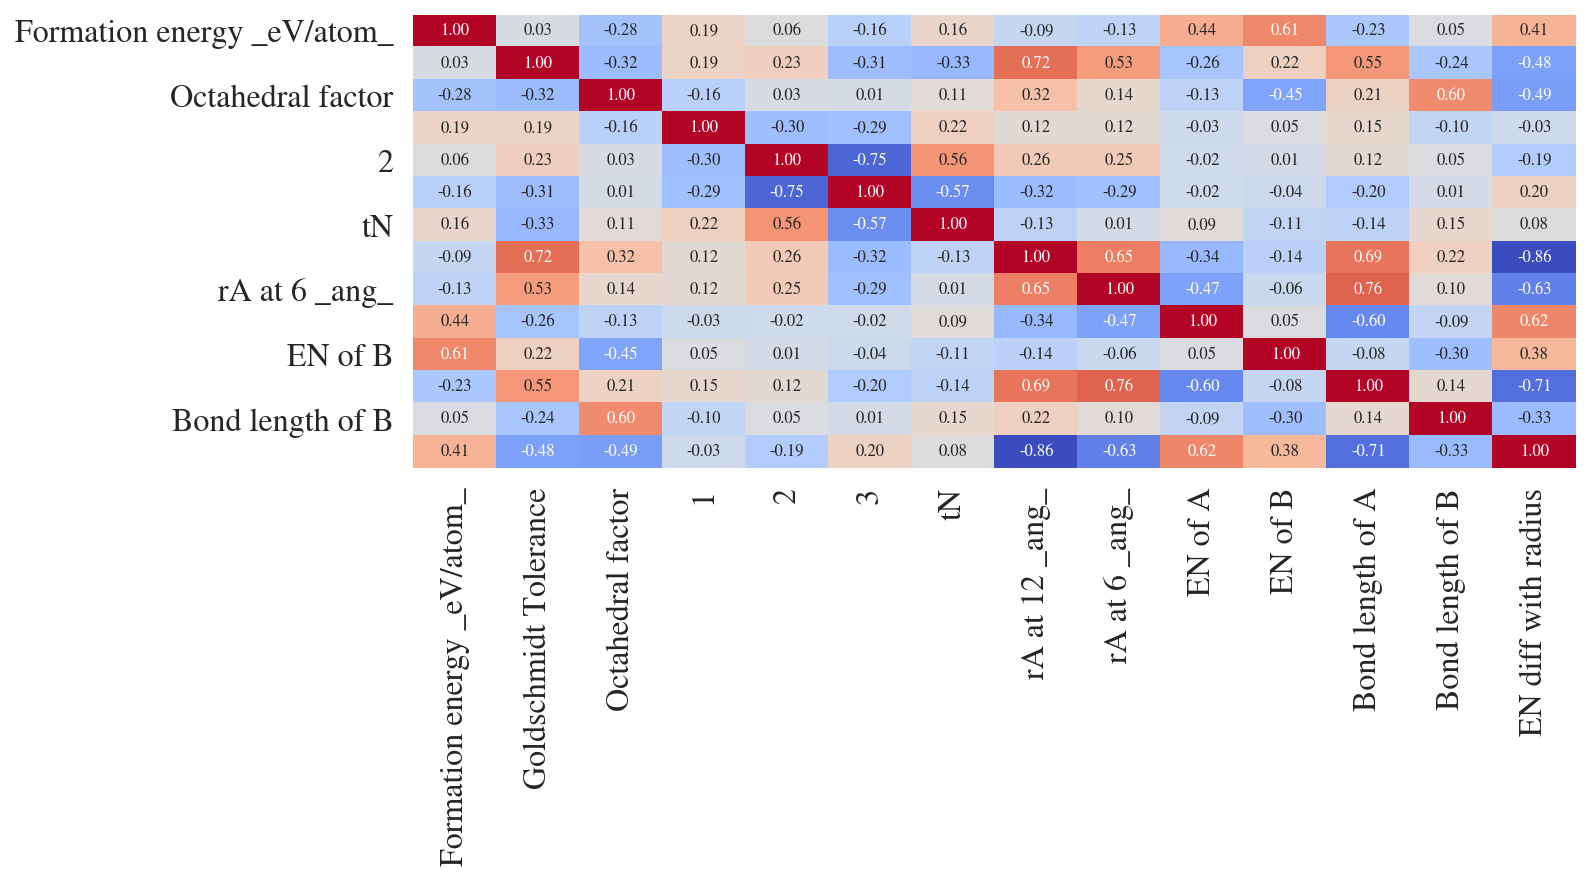

In [173]:
#X.drop(["Formation energy _eV/atom_"],axis=1,inplace=True)
fig, ax = plt.subplots()
#plt.figure(figsize=(20,20))
sns.heatmap(X.corr(method='spearman'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
sns.set(font_scale=1)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")

plt.savefig('correlation of rB.tif', bbox_inches='tight', pad_inches=0.0)

In [174]:
test['Lowest distortion'].value_counts()

1    362
0    261
2     33
3     19
Name: Lowest distortion, dtype: int64

In [175]:
categorical['Lowest distortion'].value_counts()

orthorhombic    362
cubic           261
rhombohedral     33
tetragonal       19
Name: Lowest distortion, dtype: int64

In [176]:
## Train test split

In [177]:
X_train_with_formation, X_test_with_formation, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [178]:
X_train=X_train_with_formation.drop(['Formation energy _eV/atom_','Chemical formula'],axis=1)
X_test=X_test_with_formation.drop(['Formation energy _eV/atom_','Chemical formula'],axis=1)

In [179]:
train_data = pd.concat([X_train, y_train], axis=1)

In [180]:
y_train.value_counts()

1    242
0    179
2     22
3      9
Name: Lowest distortion, dtype: int64

In [181]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

In [182]:
cubic = train_data[train_data['Lowest distortion']==0]
orthorhombic = train_data[train_data['Lowest distortion']==1]
rhombohedral = train_data[train_data['Lowest distortion']==2]
tetragonal= train_data[train_data['Lowest distortion']==3]

In [183]:
# upsample minority
rho_upsampled = resample(rhombohedral,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
tetra_upsampled = resample(tetragonal,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
cubic_upsampled = resample(cubic,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

In [184]:
upsampled = pd.concat([orthorhombic, rho_upsampled, cubic_upsampled, tetra_upsampled])

In [185]:
upsampled['Lowest distortion'].value_counts()

3    242
2    242
1    242
0    242
Name: Lowest distortion, dtype: int64

In [186]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [188]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [189]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## K fold CV

In [74]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

In [424]:
from numpy import mean
from numpy import std

In [145]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=400,importance_type='gain',learning_rate=0.5,min_child_samples=40)

In [146]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.5, max_depth=-1,
               min_child_samples=40, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [147]:
model1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [190]:
model2=svm.SVC(decision_function_shape='ovo',gamma='scale')

In [149]:
model3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
model4

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

In [191]:
scores = cross_val_score(model2, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

In [192]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.659 (0.028)


In [193]:
scores=[]
for train_ix, test_ix in kfold.split(X, y):
    train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    
   # X_train_kfold=train_X.drop('Formation energy _eV/atom_',axis=1)
    # X_test_kfold=test_X.drop('Formation energy _eV/atom_',axis=1)
    
    train_data = pd.concat([train_X, train_y], axis=1)
    
    cubic = train_data[train_data['Lowest distortion']==0]
    orthorhombic = train_data[train_data['Lowest distortion']==1]
    rhombohedral = train_data[train_data['Lowest distortion']==2]
    tetragonal= train_data[train_data['Lowest distortion']==3]
    
    # upsample minority
    rho_upsampled = resample(rhombohedral,
     replace=True, # sample with replacement
     n_samples=len(orthorhombic), # match number in majority class
     random_state=27) # reproducible results

    # upsample minority
    tetra_upsampled = resample(tetragonal,
     replace=True, # sample with replacement
     n_samples=len(orthorhombic), # match number in majority class
     random_state=27) # reproducible results

    # upsample minority
    cubic_upsampled = resample(cubic,
     replace=True, # sample with replacement
     n_samples=len(orthorhombic), # match number in majority class
     random_state=27) # reproducible results
    
    upsampled = pd.concat([orthorhombic, rho_upsampled, cubic_upsampled, tetra_upsampled])
    
    X_new_kfold=upsampled.drop('Lowest distortion',axis=1)
    y_new_kfold=upsampled['Lowest distortion']
    
    model2.fit(X_new_kfold, y_new_kfold)
    scores.append(model2.score(test_X,test_y))

In [194]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.505 (0.118)


## SVM

In [454]:
model2 = svm.SVC(gamma='auto')

In [180]:
model2 = svm.NuSVC(decision_function_shape='ovo',gamma='scale')

In [549]:
model2.fit(X_new, y_new)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [550]:
model2.score(X_new,y_new)

0.7179752066115702

In [551]:
model2.score(X_test,y_test)

0.6591928251121076

In [382]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.6591928251121076

In [383]:
confusion_matrix(preds,y_test)

array([[53, 17,  2,  1],
       [19, 82,  2,  1],
       [ 3, 14,  5,  1],
       [ 7,  7,  2,  7]], dtype=int64)

In [384]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

In [385]:
pd.Series(preds).value_counts()

1    104
0     73
3     23
2     23
dtype: int64

In [224]:
# ACC should be above 463/731 which is 63.33%
# ACC should be above 764/1221 which is 62.57% IN the case of taking the values within TG and OF limits


#With valence
#acc=0.5636114911080712
#array([[266,  56,  21,   2],
 #      [125, 132,   9,   3],
  #     [ 45,  19,   8,   2],
   #    [ 27,   6,   4,   6]], dtype=int64)
    
#Without valence
#acc=0.5636114911080712

#array([[682, 118,  33,  11],
#       [144, 237,  28,   6],
#       [164, 114,  42,   0],
#       [ 88,  41,  10,  24]], dtype=int64)

#only real values
#acc=0.6285714285714286
#array([[ 3, 19,  1,  1],
 #      [ 2, 41,  2,  0],
  #     [ 0,  0,  0,  0],
    #   [ 0,  0,  1,  0]], dtype=int64)
    
#using VA/VB
#acc=0.5690834473324213
#array([[279,  56,  11,   2],
#       [ 84, 114,   8,   4],
#       [ 80,  27,  18,   2],
#       [ 20,  16,   5,   5]], dtype=int64)

#Using en and bl
#acc=0.5677154582763337

#using Va and VB
#acc=0.5622435020519836

#limits TG .6 to 1.1
        # OF .414 to .732
##acc within the limits =0.49303849303849306 and ignoring valencies
## taking valencies 0.5617173524150268
# 336/559 acc should be greater than this for valencies and and limits THAT is 60.1%

#One hot encoding decreased the acc to 0.5366726296958855

#limits TG .8 to 1.05
        # OF .414 to .732
    #acc=0.5870445344129555

## XGBoost

In [206]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

0.9679752066115702

In [207]:
model1.score(X_test,y_test)

0.7847533632286996

In [208]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.7847533632286996

In [209]:
confusion_matrix(preds,y_test)

array([[66, 11,  1,  1],
       [13, 99,  3,  1],
       [ 2,  9,  6,  4],
       [ 1,  1,  1,  4]], dtype=int64)

In [210]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

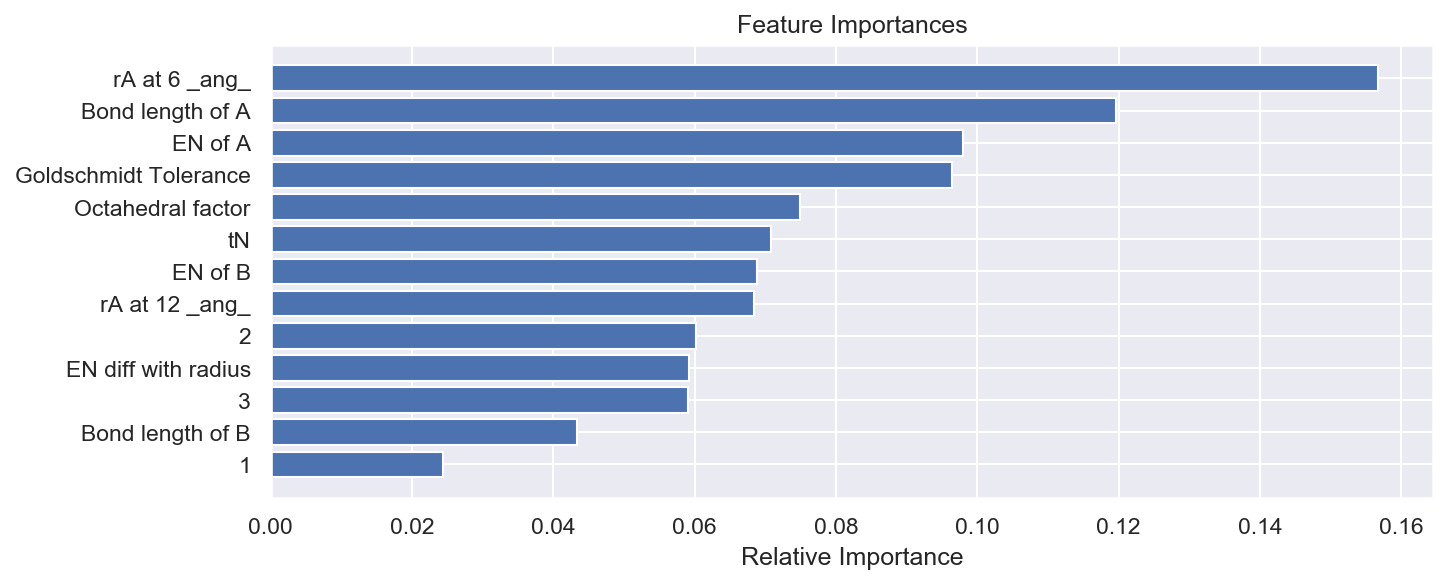

In [211]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [212]:
#acc with only valence A = 0.6607387140902873
#array([[327,  48,   7,   0],
#       [ 74, 121,   8,   0],
#       [ 38,  27,  25,   3],
#       [ 24,  17,   2,  10]], dtype=int64)

#using VA/VB
#0.6566347469220246

#Without taking the valencies 
#acc=0.6061997703788748

# New tolerance factor performs better than tR
##takin en and bl
#acc=0.7209302325581395

#VA/VB and Valence B do not have any effect

# VA and VB also have no effect in the prediction and rB at 6 also has no effect
#acc=0.719562243502052

#limits TG .6 to 1.1
        # OF .414 to .732
## When taking the limits acc fell to 0.6920556920556921 and ignoring valencies
# limits and valencies gives highest acc yet 0.7638640429338104

# on hot enconding on valence A gives best acc yet =0.7656529516994633 this is in additional to the limits and removing empty valence values
# introducing EN diff gives acc=0.7692307692307693
#taking en diff with with radius multiplied increased the acc to = 0.774597495527728

#when

## Decision Tree

In [194]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [195]:
model3.score(X_test,y_test)

0.6995515695067265

In [196]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.6995515695067265

In [197]:
confusion_matrix(preds,y_test)

array([[61, 18,  1,  2],
       [18, 90,  6,  2],
       [ 2, 10,  1,  2],
       [ 1,  2,  3,  4]], dtype=int64)

In [198]:
pd.Series(preds).value_counts()

1    116
0     82
2     15
3     10
dtype: int64

## Random Forest

In [199]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [200]:
model4.score(X_test,y_test)

0.7623318385650224

In [201]:
accuracy_score(preds,y_test)

0.6995515695067265

In [202]:
confusion_matrix(preds,y_test)

array([[61, 18,  1,  2],
       [18, 90,  6,  2],
       [ 2, 10,  1,  2],
       [ 1,  2,  3,  4]], dtype=int64)

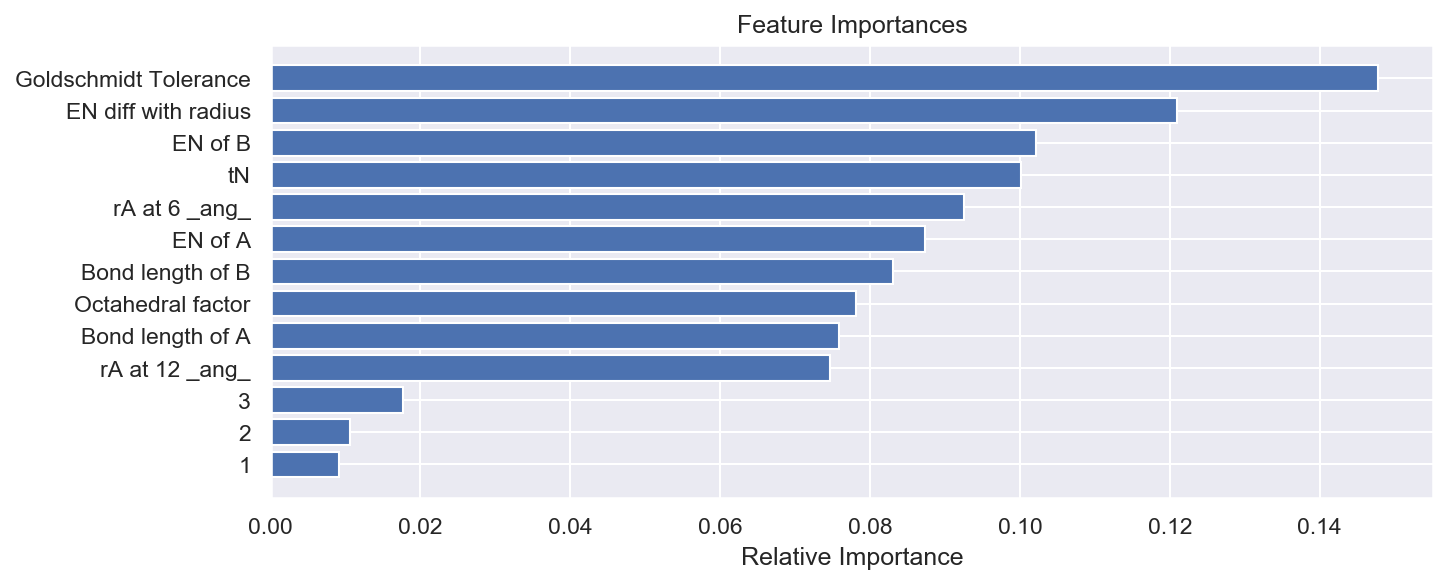

In [203]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [204]:
importances

array([0.1477621 , 0.0780979 , 0.00916174, 0.01059989, 0.01772599,
       0.10013124, 0.07470149, 0.09258008, 0.08727581, 0.10210071,
       0.07584584, 0.08310974, 0.12090746])

In [205]:
#with both valence a and b
#0.7113543091655267
#array([[381,  71,  10,   4],
#       [ 64, 113,   9,   3],
#       [ 13,  21,  22,   2],
#       [  5,   8,   1,   4]], dtype=int64)

#without valence B
#unchanged.

#Using VA/VB
#0.7099863201094391

#using en and bl
#acc=0.7346101231190151




## Using LightGBM as a classifier

In [74]:
#import lightgbm as lgb# Default gradient boosting machine classifier
#model = lgb.LGBMClassifier(importance_type='gain',n_estimators=500)
#model

In [190]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=500,importance_type='gain')

In [191]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [192]:
model.fit(X_new, y_new)
model.score(X_new,y_new)

1.0

In [193]:
model.score(X_test,y_test)

0.8071748878923767

In [194]:
preds = model.predict(X_test)
accuracy_score(preds,y_test)

0.8071748878923767

In [195]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh

In [196]:
y_test.value_counts()

1    120
0     82
2     11
3     10
Name: Lowest distortion, dtype: int64

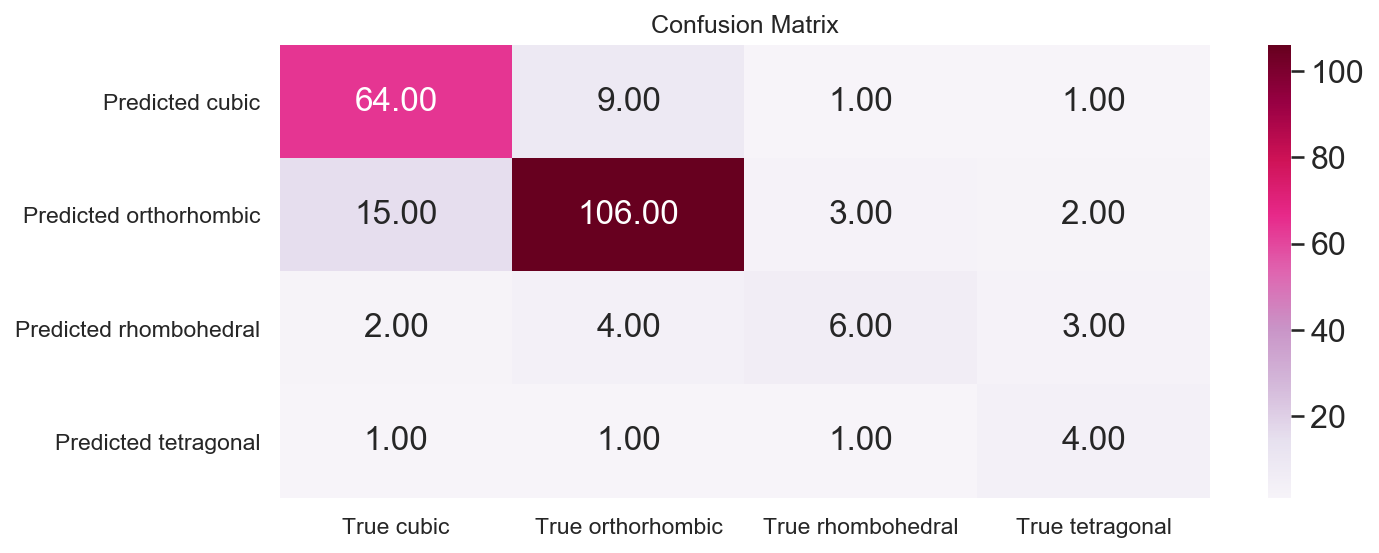

In [197]:
array = confusion_matrix(preds,y_test)

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.set(font_scale=1.4) # for label size
df_cm = pd.DataFrame(array, index=["Predicted cubic", "Predicted orthorhombic", "Predicted rhombohedral", "Predicted tetragonal"], columns=["True cubic", "True orthorhombic", "True rhombohedral", "True tetragonal"])
sns.heatmap(df_cm,cmap="PuRd",fmt = '.2f', annot=True, annot_kws={"size": 16}) # font size
plt.savefig('confusion_matrix.tif', bbox_inches='tight', pad_inches=2.0)
plt.show()

In [198]:
confusion_matrix(preds,y_test)

array([[ 64,   9,   1,   1],
       [ 15, 106,   3,   2],
       [  2,   4,   6,   3],
       [  1,   1,   1,   4]], dtype=int64)

In [199]:
X_test

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
396,0.820859,0.642857,0,0,1,4.848270,1.27,0.98,1.14,1.23,2.617634,2.258656,-6.627714
302,1.069455,0.435714,1,0,0,4.013530,1.64,1.38,0.82,2.16,3.025719,1.789300,-7.656571
673,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-5.791714
541,0.883883,0.428571,0,1,0,4.382583,1.10,0.84,1.20,2.28,2.557065,2.001424,-4.960000
377,0.830235,0.435714,0,1,0,5.236028,0.96,0.62,1.55,1.54,2.472899,1.927849,-4.482714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.928737,0.435714,0,0,1,1.891494,1.24,0.96,1.17,1.88,2.611965,1.930311,-5.737143
380,0.981506,0.435714,1,0,0,4.061824,1.39,1.02,0.93,2.16,2.759925,1.789300,-6.465214
9,1.069543,0.421429,0,1,0,3.809486,1.61,1.35,0.89,1.83,2.942999,1.999522,-7.567000
22,0.985366,0.542857,0,1,0,3.486178,1.61,1.35,0.89,1.20,2.942999,2.256933,-8.104500


In [200]:
preds=le_target.inverse_transform(preds)

In [201]:
preds_df = pd.DataFrame(preds)

In [202]:
#preds

In [203]:
y_test=le_target.inverse_transform(y_test)

In [204]:
y_test_df= pd.DataFrame(y_test)

In [205]:
X_test

,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius
396,0.820859,0.642857,0,0,1,4.848270,1.27,0.98,1.14,1.23,2.617634,2.258656,-6.627714
302,1.069455,0.435714,1,0,0,4.013530,1.64,1.38,0.82,2.16,3.025719,1.789300,-7.656571
673,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-5.791714
541,0.883883,0.428571,0,1,0,4.382583,1.10,0.84,1.20,2.28,2.557065,2.001424,-4.960000
377,0.830235,0.435714,0,1,0,5.236028,0.96,0.62,1.55,1.54,2.472899,1.927849,-4.482714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.928737,0.435714,0,0,1,1.891494,1.24,0.96,1.17,1.88,2.611965,1.930311,-5.737143
380,0.981506,0.435714,1,0,0,4.061824,1.39,1.02,0.93,2.16,2.759925,1.789300,-6.465214
9,1.069543,0.421429,0,1,0,3.809486,1.61,1.35,0.89,1.83,2.942999,1.999522,-7.567000
22,0.985366,0.542857,0,1,0,3.486178,1.61,1.35,0.89,1.20,2.942999,2.256933,-8.104500


In [206]:
preds_df

,0
0,cubic
1,rhombohedral
2,orthorhombic
3,cubic
4,orthorhombic
...,...
218,orthorhombic
219,orthorhombic
220,orthorhombic
221,orthorhombic


In [207]:
y_test_df

,0
0,cubic
1,rhombohedral
2,orthorhombic
3,cubic
4,orthorhombic
...,...
218,orthorhombic
219,cubic
220,cubic
221,orthorhombic


In [208]:
df_out = X_test_with_formation.reset_index()
df_out["Actual"] = y_test_df.reset_index()[0]
df_out["Prediction"] = preds_df.reset_index()[0]

In [209]:
df_mismatch=df_out[df_out['Actual']!=df_out['Prediction']]
df_correct=df_out[df_out['Actual']==df_out['Prediction']]

In [210]:
df_out

,index,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius,Chemical formula,Actual,Prediction
0,396,-3.14,0.820859,0.642857,0,0,1,4.848270,1.27,0.98,1.14,1.23,2.617634,2.258656,-6.627714,NdHoO3,cubic,cubic
1,302,-2.25,1.069455,0.435714,1,0,0,4.013530,1.64,1.38,0.82,2.16,3.025719,1.789300,-7.656571,KMoO3,rhombohedral,rhombohedral
2,673,-3.66,0.847194,0.514286,0,1,0,4.835508,1.14,0.95,1.10,1.33,2.519261,2.043778,-5.791714,YbZrO3,orthorhombic,orthorhombic
3,541,-1.75,0.883883,0.428571,0,1,0,4.382583,1.10,0.84,1.20,2.28,2.557065,2.001424,-4.960000,TbRhO3,cubic,cubic
4,377,-2.78,0.830235,0.435714,0,1,0,5.236028,0.96,0.62,1.55,1.54,2.472899,1.927849,-4.482714,MnTiO3,orthorhombic,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,482,-2.49,0.928737,0.435714,0,0,1,1.891494,1.24,0.96,1.17,1.88,2.611965,1.930311,-5.737143,SmCoO3,orthorhombic,orthorhombic
219,380,-2.25,0.981506,0.435714,1,0,0,4.061824,1.39,1.02,0.93,2.16,2.759925,1.789300,-6.465214,NaMoO3,cubic,orthorhombic
220,9,-2.10,1.069543,0.421429,0,1,0,3.809486,1.61,1.35,0.89,1.83,2.942999,1.999522,-7.567000,BaFeO3,cubic,orthorhombic
221,22,-2.83,0.985366,0.542857,0,1,0,3.486178,1.61,1.35,0.89,1.20,2.942999,2.256933,-8.104500,BaTbO3,orthorhombic,orthorhombic


In [211]:
df_mismatch.drop('index',axis=1,inplace=True)
df_correct.drop('index',axis=1,inplace=True)

In [237]:
wp1['Lowest distortion']=le_target.inverse_transform(wp1['Lowest distortion'])

In [238]:
form=wp1[['Lowest distortion','Formation energy [eV/atom]','Chemical formula']]

In [239]:
rhom_form=form[form["Lowest distortion"]=='rhombohedral']
cubic_form=form[form["Lowest distortion"]=='cubic']
ortho_form=form[form["Lowest distortion"]=='orthorhombic']
tetra_form=form[form["Lowest distortion"]=='tetragonal']

In [240]:
df_mismatch

,Formation energy _eV/atom_,Goldschmidt Tolerance,Octahedral factor,1,2,3,tN,rA at 12 _ang_,rA at 6 _ang_,EN of A,EN of B,Bond length of A,Bond length of B,EN diff with radius,Chemical formula,Actual,Prediction
12,-2.01,0.942809,0.414286,0,0,1,1.854788,1.24,0.96,1.17,2.18,2.611965,1.932227,-5.579429,SmAsO3,cubic,orthorhombic
16,-1.92,1.085659,0.414286,1,0,0,4.134134,1.64,1.38,0.82,1.90,3.025719,1.987971,-7.736857,KReO3,cubic,tetragonal
19,-2.71,0.829243,0.571429,0,0,1,4.135331,1.18,0.92,1.13,1.78,2.645083,2.147681,-5.795000,PrInO3,orthorhombic,cubic
34,-2.67,0.836794,0.635714,0,1,0,5.188444,1.31,0.95,1.69,1.38,2.568546,2.047800,-6.165929,CdUO3,orthorhombic,cubic
41,-3.63,1.008716,0.507143,0,1,0,3.511193,1.61,1.35,0.89,1.30,2.942999,2.027412,-7.973786,BaHfO3,cubic,orthorhombic
43,-0.44,0.889134,0.442857,0,1,0,4.295885,1.14,1.11,2.00,2.20,2.645968,2.042505,-4.522857,HgPdO3,orthorhombic,rhombohedral
45,-1.86,0.897748,0.457143,1,0,0,4.185330,1.19,1.11,2.00,1.60,2.645968,1.955055,-4.989143,HgNbO3,tetragonal,rhombohedral
48,-2.59,0.862406,0.528571,0,0,0,-0.806904,1.21,0.94,1.30,1.65,2.582926,2.096141,-5.768857,ThZnO3,cubic,orthorhombic
49,-1.91,0.820244,0.428571,1,0,0,4.920548,0.92,0.76,0.98,2.05,2.453212,2.075849,-4.472857,LiSbO3,rhombohedral,orthorhombic
50,-2.08,0.897748,0.457143,1,0,0,4.185330,1.19,1.11,2.00,1.50,2.645968,1.956808,-5.034857,HgTaO3,cubic,rhombohedral


In [241]:
misclassified_rhom=df_mismatch[df_mismatch["Prediction"]=='rhombohedral']#blue
failed_to_classify_as_rhom=df_mismatch[df_mismatch["Actual"]=='rhombohedral']#red
correctly_rhom=df_correct[df_correct["Prediction"]=='rhombohedral']

misclassified_cubic=df_mismatch[df_mismatch["Prediction"]=='cubic']
failed_to_classify_as_cubic=df_mismatch[df_mismatch["Actual"]=='cubic']
correctly_cubic=df_correct[df_correct["Prediction"]=='cubic']

misclassified_ortho=df_mismatch[df_mismatch["Prediction"]=='orthorhombic']
failed_to_classify_as_ortho=df_mismatch[df_mismatch["Actual"]=='orthorhombic']
correctly_ortho=df_correct[df_correct["Prediction"]=='orthorhombic']

misclassified_tetra=df_mismatch[df_mismatch["Prediction"]=='tetragonal']
failed_to_classify_as_tetra=df_mismatch[df_mismatch["Actual"]=='tetragonal']
correctly_tetra=df_correct[df_correct["Prediction"]=='tetragonal']

In [242]:
revised_misclassified_rhom=pd.concat([misclassified_rhom,failed_to_classify_as_rhom])
revised_misclassified_cubic=pd.concat([misclassified_cubic,failed_to_classify_as_cubic])
revised_misclassified_ortho=pd.concat([misclassified_ortho,failed_to_classify_as_ortho])
revised_misclassified_tetra=pd.concat([misclassified_tetra,failed_to_classify_as_tetra])

In [243]:
failed_to_classify_as_rhom=failed_to_classify_as_rhom[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
failed_to_classify_as_ortho=failed_to_classify_as_ortho[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
failed_to_classify_as_cubic=failed_to_classify_as_cubic[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
failed_to_classify_as_tetra=failed_to_classify_as_tetra[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]

In [244]:
misclassified_rhom=misclassified_rhom[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
misclassified_ortho=misclassified_ortho[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
misclassified_cubic=misclassified_cubic[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
misclassified_tetra=misclassified_tetra[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]

In [245]:
correctly_rhom=correctly_rhom[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
correctly_ortho=correctly_ortho[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
correctly_cubic=correctly_cubic[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]
correctly_tetra=correctly_tetra[['Chemical formula','Formation energy _eV/atom_','Actual','Prediction']]

In [261]:
rhom_form['Formation energy [eV/atom]'].describe()

count    33.000000
mean     -2.170606
std       0.680533
min      -3.780000
25%      -2.430000
50%      -2.240000
75%      -1.920000
max      -0.630000
Name: Formation energy [eV/atom], dtype: float64

In [262]:
ortho_form['Formation energy [eV/atom]'].describe()

count    362.000000
mean      -2.571768
std        0.723220
min       -3.840000
25%       -3.115000
50%       -2.670000
75%       -2.170000
max       -0.440000
Name: Formation energy [eV/atom], dtype: float64

In [263]:
tetra_form['Formation energy [eV/atom]'].describe()

count    19.000000
mean     -2.054210
std       0.614458
min      -3.290000
25%      -2.470000
50%      -2.060000
75%      -1.595000
max      -1.070000
Name: Formation energy [eV/atom], dtype: float64

In [264]:
cubic_form['Formation energy [eV/atom]'].describe()

count    261.000000
mean      -2.123142
std        0.622315
min       -3.630000
25%       -2.590000
50%       -2.080000
75%       -1.760000
max       -0.220000
Name: Formation energy [eV/atom], dtype: float64

In [265]:
misclassified_rhom

,Chemical formula,Formation energy _eV/atom_,Actual,Prediction
43,HgPdO3,-0.44,orthorhombic,rhombohedral
45,HgNbO3,-1.86,tetragonal,rhombohedral
50,HgTaO3,-2.08,cubic,rhombohedral
52,PbTiO3,-2.52,tetragonal,rhombohedral
132,EuFeO3,-2.42,orthorhombic,rhombohedral
156,LaTmO3,-3.80,orthorhombic,rhombohedral
200,PbMoO3,-1.75,tetragonal,rhombohedral
203,PbHfO3,-2.82,orthorhombic,rhombohedral
205,PbReO3,-1.37,cubic,rhombohedral


In [270]:
misclassified_rhom.to_csv('misclassified_rhom.csv')

In [273]:
misclassified_ortho.to_csv('misclassified_ortho.csv')

In [272]:
misclassified_tetra.to_csv('misclassified_tetra.csv')

In [271]:
misclassified_cubic.to_csv('misclassified_cubic.csv')

In [104]:
#rhom_form['Formation energy [eV/atom]'].describe()

In [105]:
#misclassified_rhom['Formation energy _eV/atom_'].describe()

In [106]:
#ortho_form['Formation energy [eV/atom]'].describe()

In [107]:
#misclassified_ortho['Formation energy _eV/atom_'].describe()

In [108]:
#tetra_form['Formation energy [eV/atom]'].describe()

In [109]:
#misclassified_tetra['Formation energy _eV/atom_'].describe()

In [460]:
#cubic_form['Formation energy [eV/atom]'].describe()

In [304]:
#misclassified_cubic['Formation energy _eV/atom_'].describe()

## Formation energy with misclassified predicted into account

In [113]:
sns.set(rc={"lines.linewidth":3})

Text(0.5, 1, 'Formation energy for cubic')

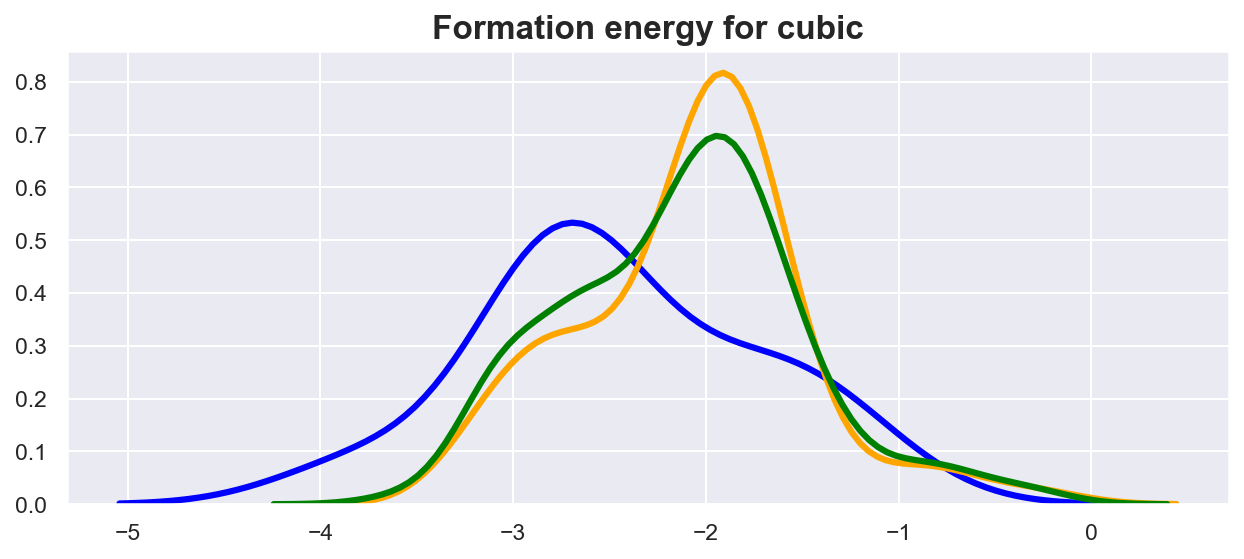

In [129]:
sns.kdeplot(misclassified_cubic['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_cubic['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(cubic_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','cubic according to DFT'],fontsize='12')
plt.savefig('cubic misclassified formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for cubic',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for rhombohedral')

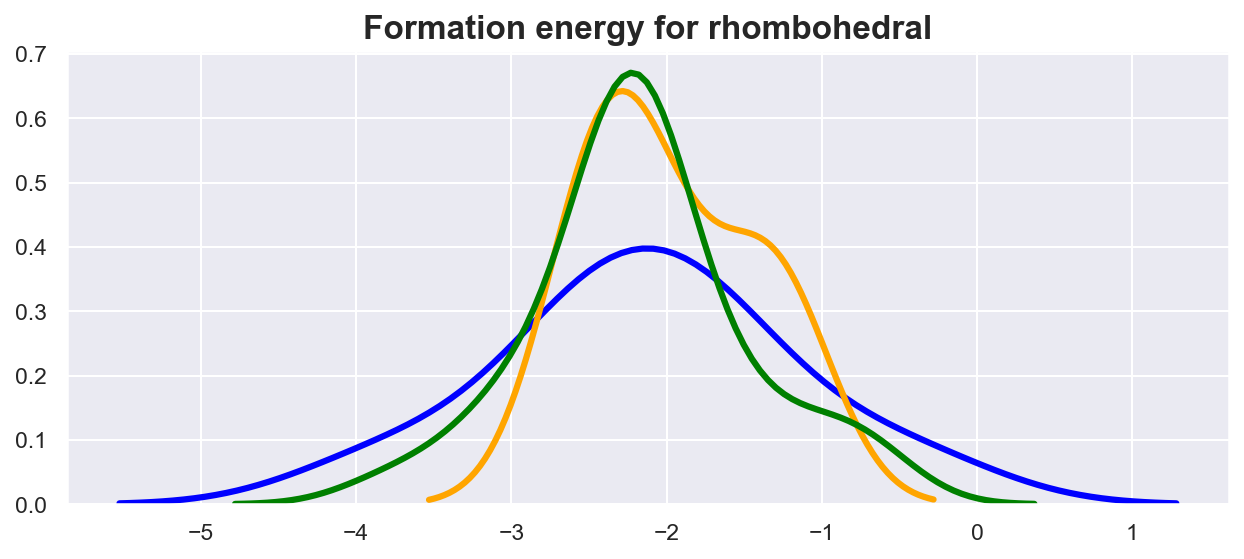

In [130]:
sns.kdeplot(misclassified_rhom['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_rhom['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(rhom_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','rhombohedral according to DFT'],fontsize='12')
plt.savefig('rhombohedral misclassified formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for rhombohedral',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for orthorhombic')

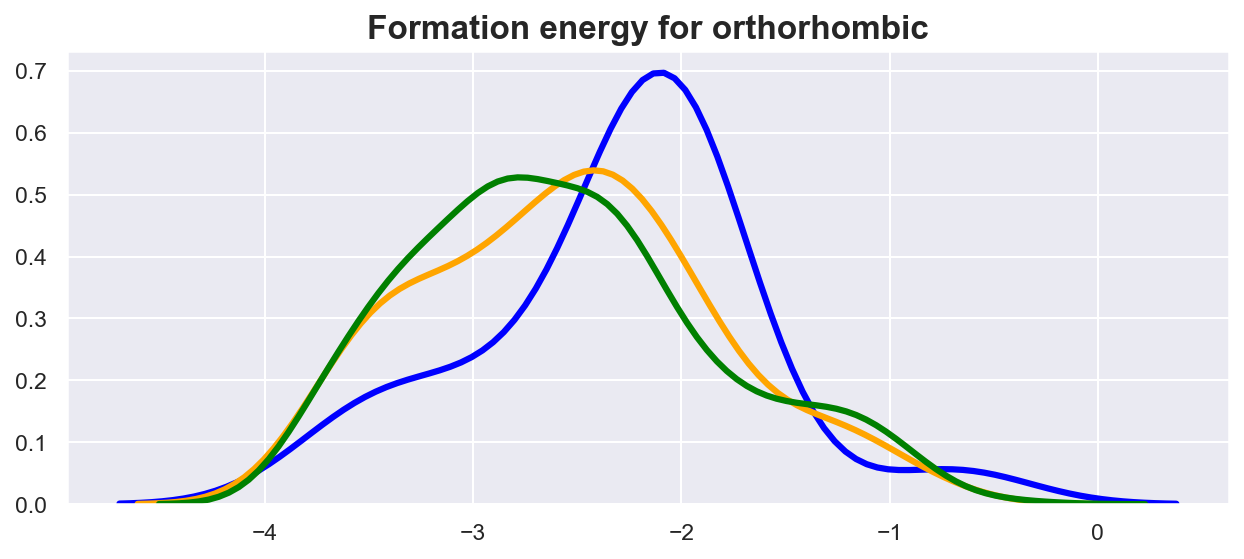

In [131]:
sns.kdeplot(misclassified_ortho['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_ortho['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(ortho_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','orthorhombic according to DFT'],fontsize='12')
plt.savefig('orthorhombic misclassified formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for orthorhombic',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for tetragonal')

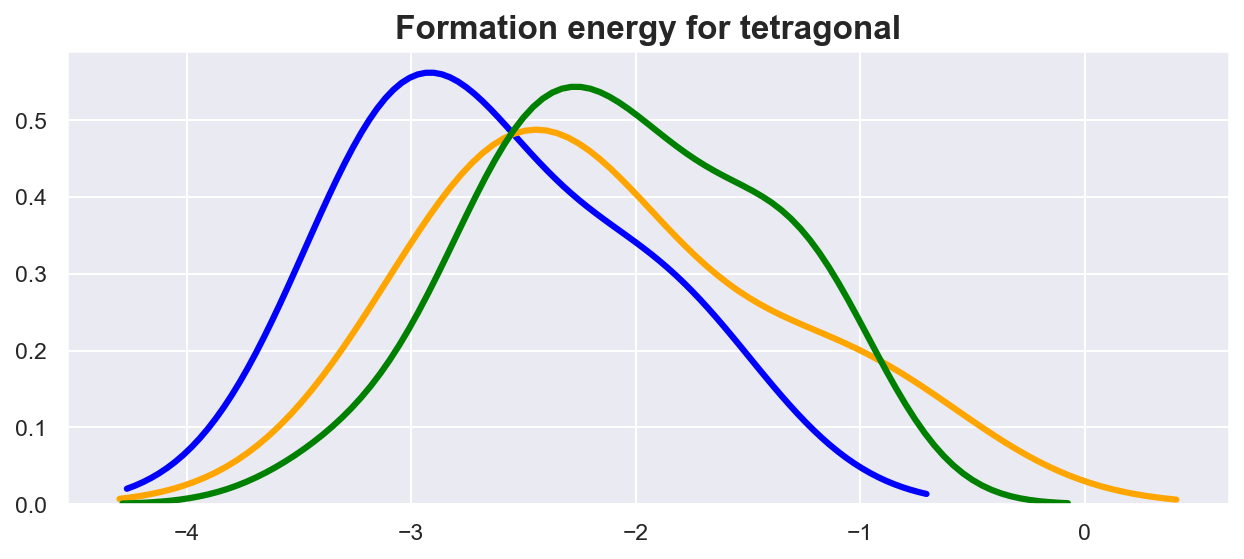

In [132]:
sns.kdeplot(misclassified_tetra['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_tetra['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(tetra_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','tetragonal according to DFT'],fontsize='12')
plt.savefig('tetragonal misclassified formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for tetragonal',weight='bold',fontsize='16')

## Formation energy with failed to classify actual into account

Text(0.5, 1, 'Formation energy for cubic')

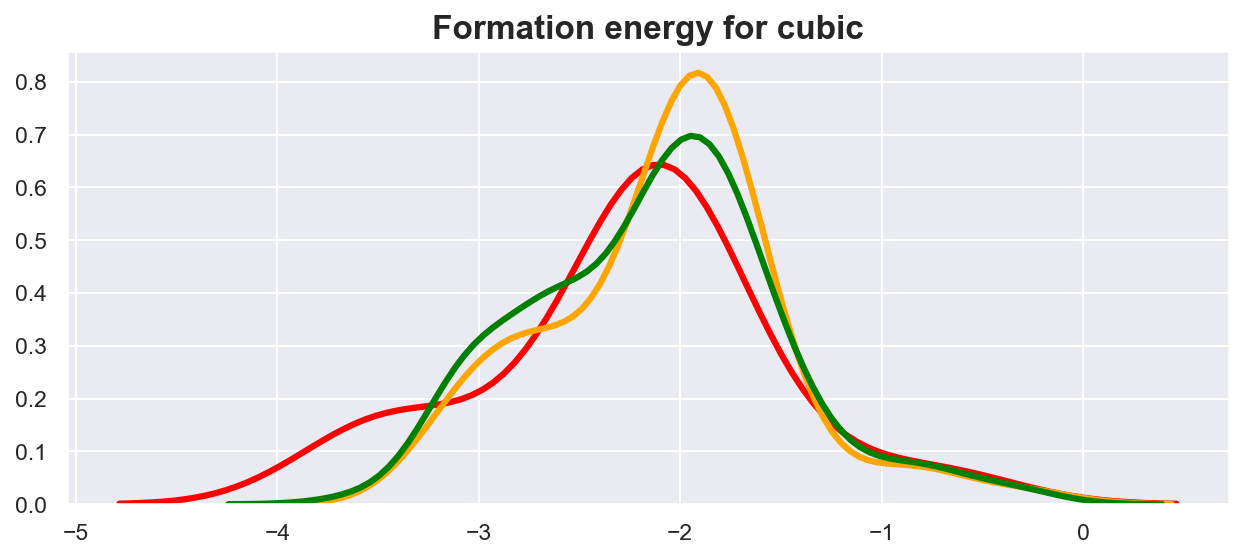

In [133]:
sns.kdeplot(failed_to_classify_as_cubic['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_cubic['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(cubic_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','cubic according to DFT'],fontsize='12')
plt.savefig('cubic failed formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for cubic',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for rhombohedral')

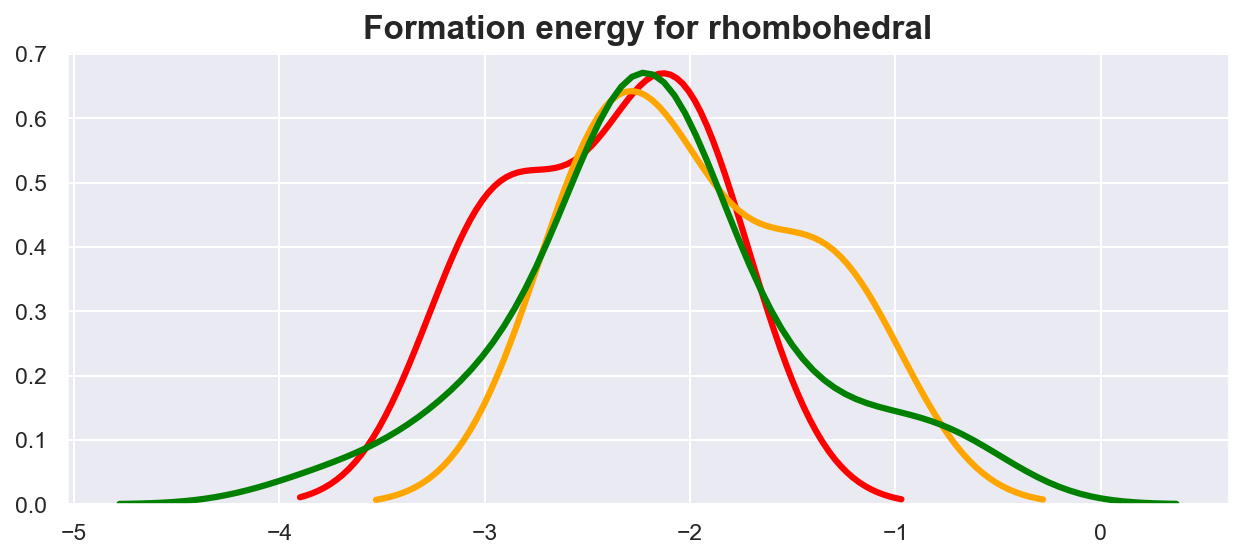

In [134]:
sns.kdeplot(failed_to_classify_as_rhom['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_rhom['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(rhom_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','rhombohedral according to DFT'],fontsize='12')
plt.savefig('rhombohedral failed formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for rhombohedral',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for orthorhombic')

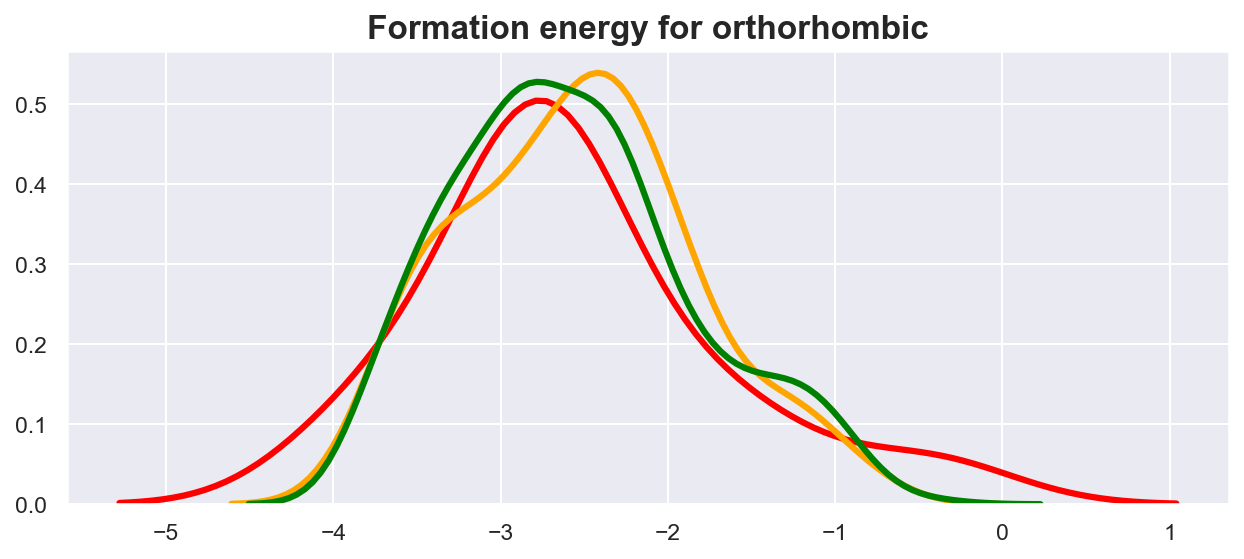

In [135]:
sns.kdeplot(failed_to_classify_as_ortho['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_ortho['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(ortho_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','orthorhombic according to DFT'],fontsize='12')
plt.savefig('orthorhombic failed formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for orthorhombic',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for tetragonal')

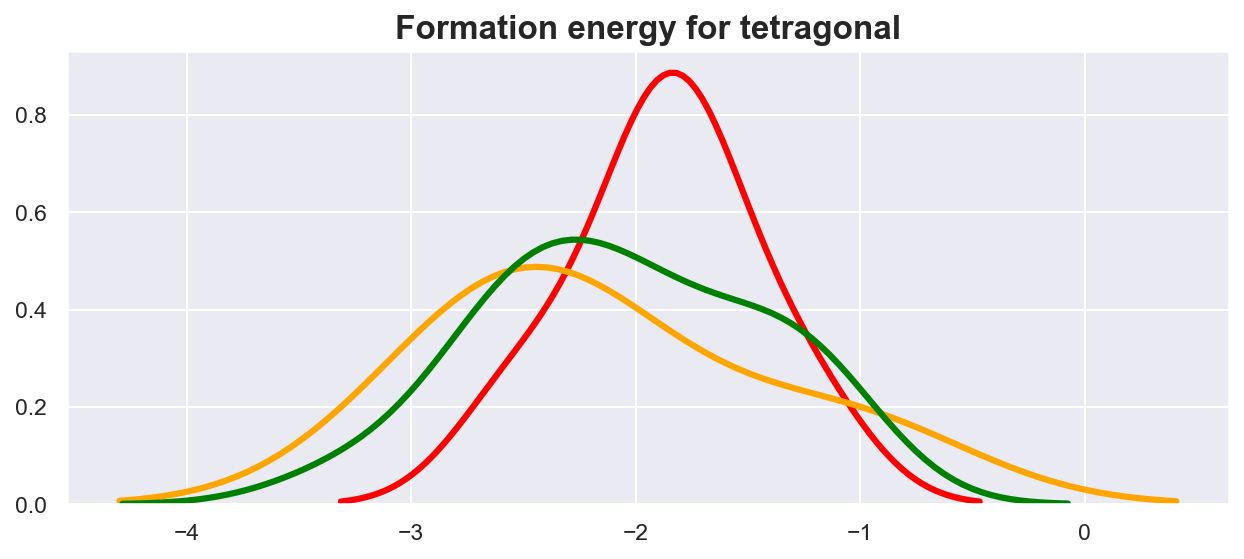

In [136]:
sns.kdeplot(failed_to_classify_as_tetra['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_tetra['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(tetra_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','tetragonal according to DFT'],fontsize='12')
plt.savefig('tetragonal failed formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for tetragonal',weight='bold',fontsize='16')

## Formation Energy taking all into account

Text(0.5, 1, 'Formation energy for cubic')

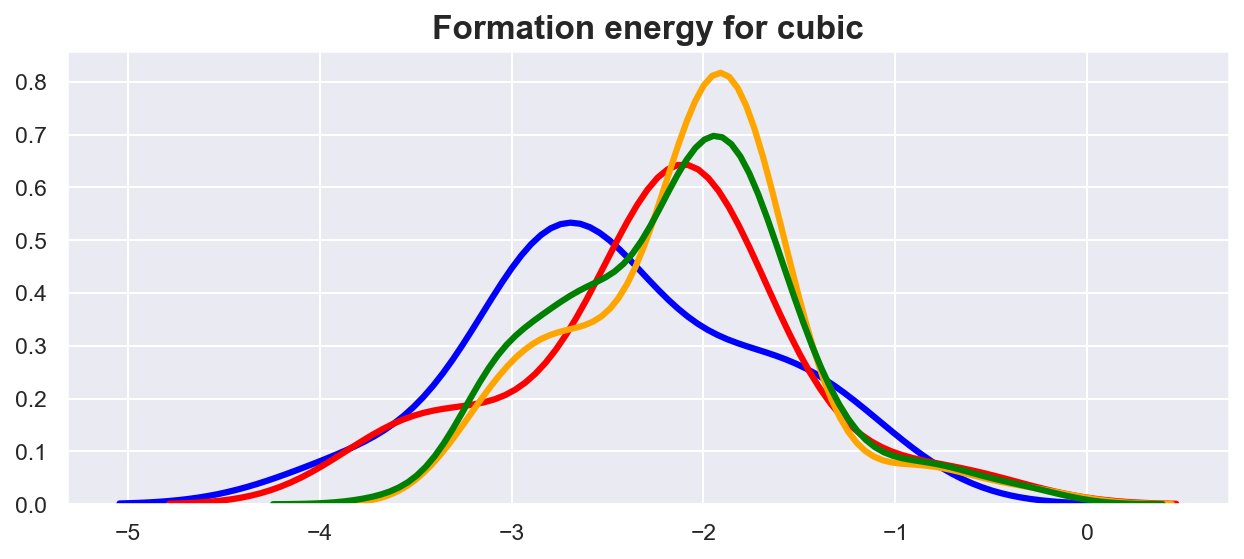

In [137]:
sns.kdeplot(misclassified_cubic['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(failed_to_classify_as_cubic['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_cubic['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(cubic_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','failed to classify','correctly classified','cubic according to DFT'],fontsize='12')
plt.savefig('cubic formation energy total.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for cubic',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for orthorhombic')

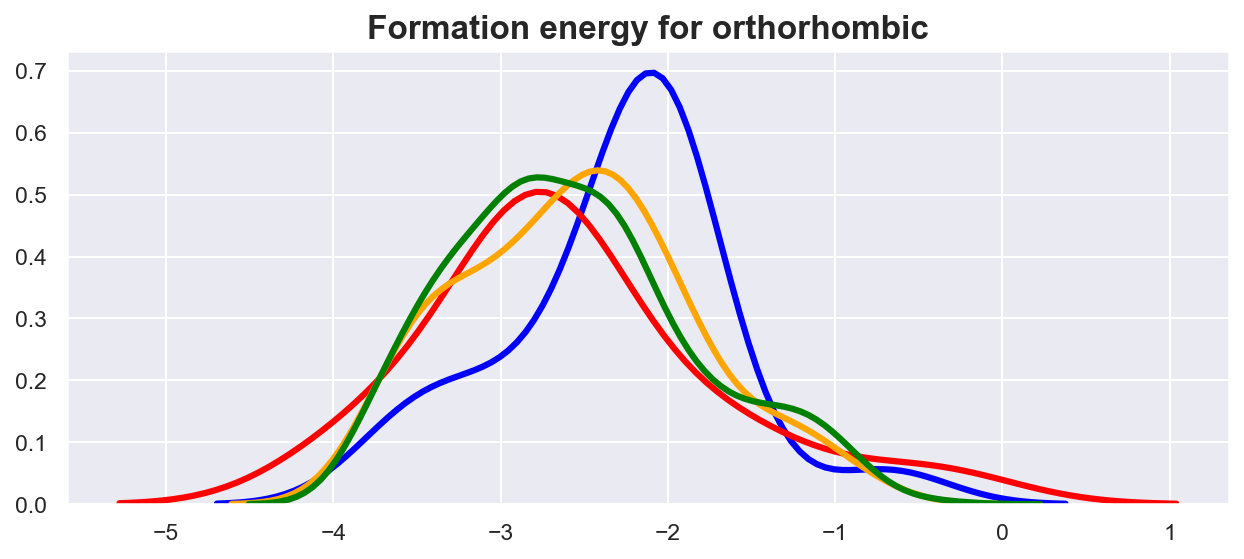

In [138]:
sns.kdeplot(misclassified_ortho['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(failed_to_classify_as_ortho['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_ortho['Formation energy _eV/atom_'],color='orange',legend=False)
sns.kdeplot(ortho_form['Formation energy [eV/atom]'],color='green',legend=False)
#plt.legend(loc='upper right', labels=['incorrectly classified','failed to classify', 'correctly classified','orthorhombic according to DFT'],fontsize='12')
plt.savefig('orthorhombic formation energy total.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for orthorhombic',weight='bold',fontsize='16')

In [826]:
import matplotlib.pylab as plt

Text(0.5, 1, 'Formation energy for rhombohedral')

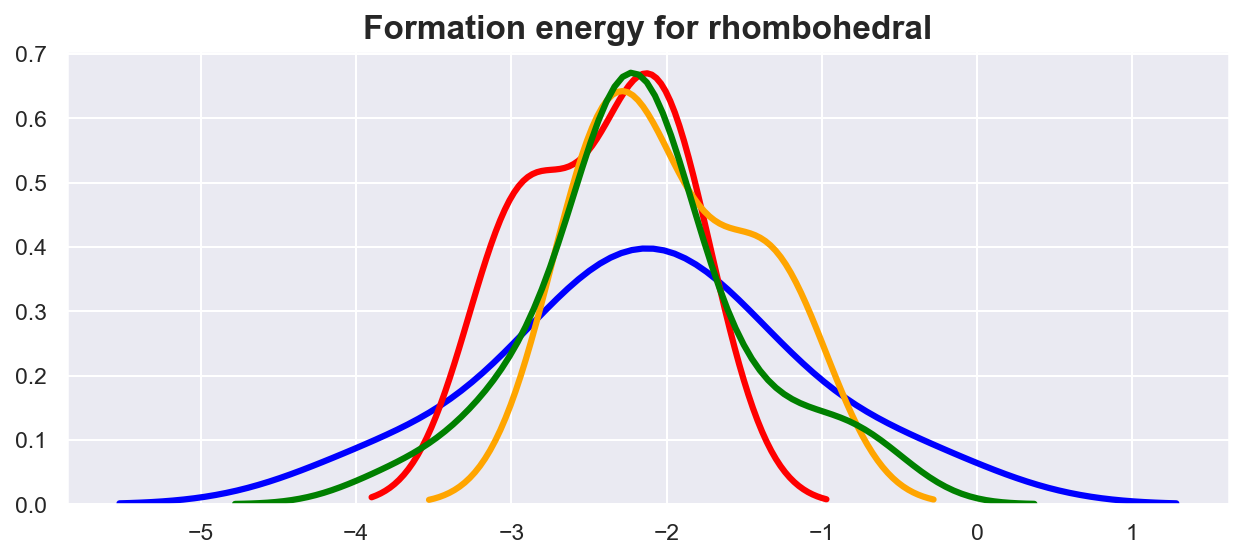

In [139]:
sns.kdeplot(misclassified_rhom['Formation energy _eV/atom_'],color='blue',legend=False)
sns.kdeplot(failed_to_classify_as_rhom['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_rhom['Formation energy _eV/atom_'],color='orange',legend=False)
sns.kdeplot(rhom_form['Formation energy [eV/atom]'],color='green',legend=False)
#plt.setp(ax.get_legend().get_texts(), fontsize='12')
#plt.legend(loc='upper right', labels=['incorrectly classified','failed to classify', 'correctly classified','rhombohedral according to DFT'],fontsize='12')
plt.savefig('rhombohedral formation energy total.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for rhombohedral',weight='bold',fontsize='16')

Text(0.5, 1, 'Formation energy for Tetragonal')

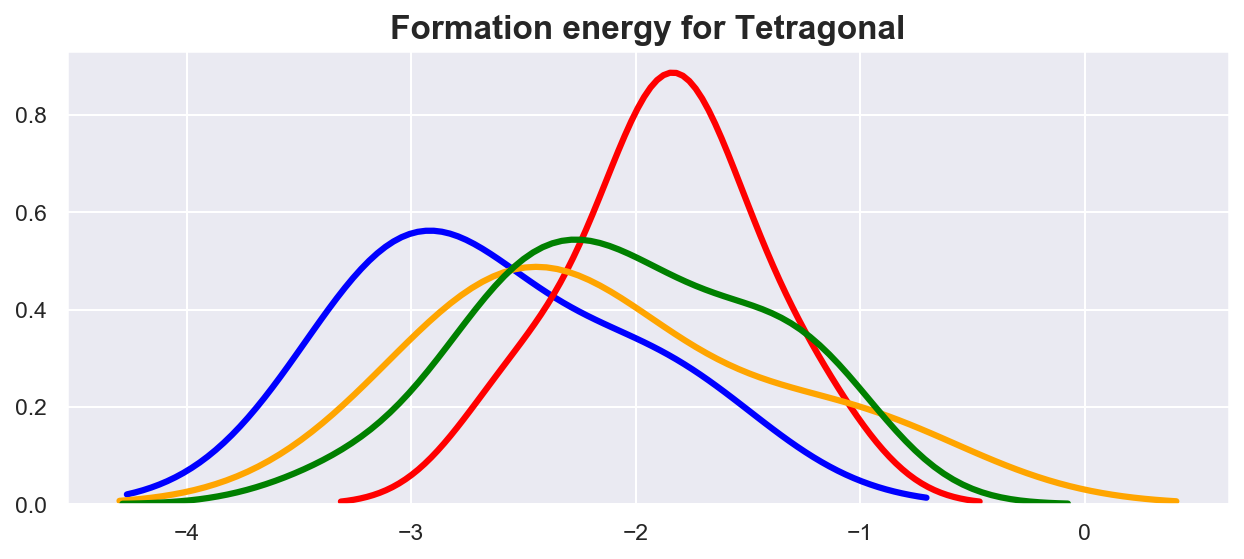

In [140]:
sns.kdeplot(misclassified_tetra['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(failed_to_classify_as_tetra['Formation energy _eV/atom_'],legend=False,color='red')
sns.kdeplot(correctly_tetra['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(tetra_form['Formation energy [eV/atom]'],legend=False,color='green')
#plt.legend(loc='upper right', labels=['incorrectly classified','failed to classify','correctly classified','tetragonal according to DFT'],fontsize='12')
plt.savefig('tetragonal formation energy total.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for Tetragonal',weight='bold',fontsize='16')

## Latest Formation Energy Methodology

Text(0.5, 1.0, 'Formation energy for rhombohedral')

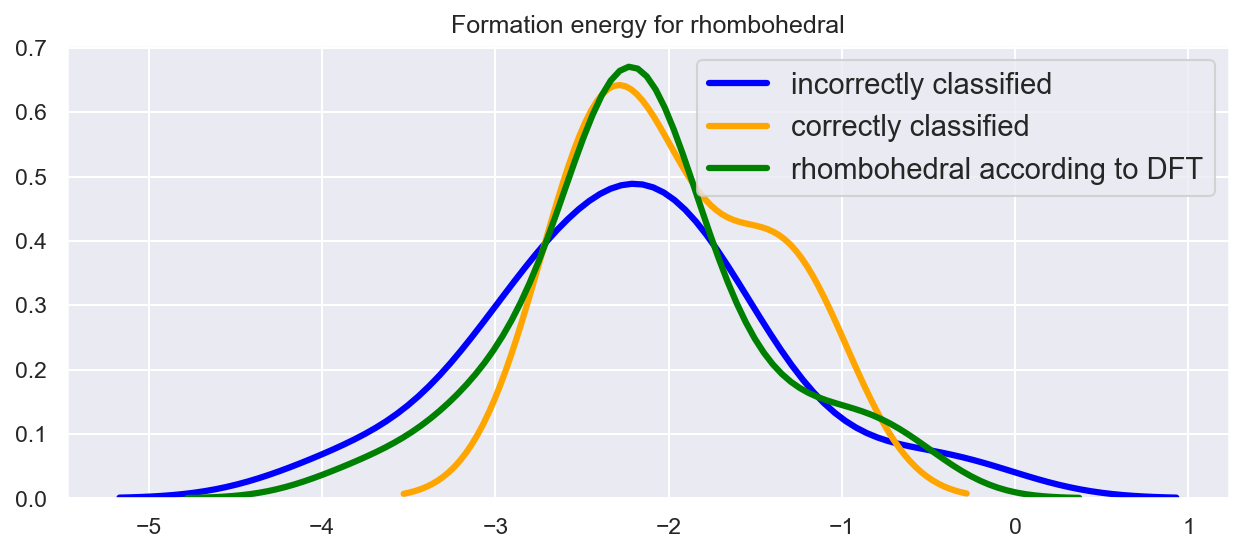

In [341]:
sns.kdeplot(revised_misclassified_rhom['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_rhom['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(rhom_form['Formation energy [eV/atom]'],legend=False,color='green')
plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','rhombohedral according to DFT'],fontsize='14')
#plt.savefig('revised rhombohedral formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for rhombohedral')

Text(0.5, 1.0, 'Formation energy for orthorhombic')

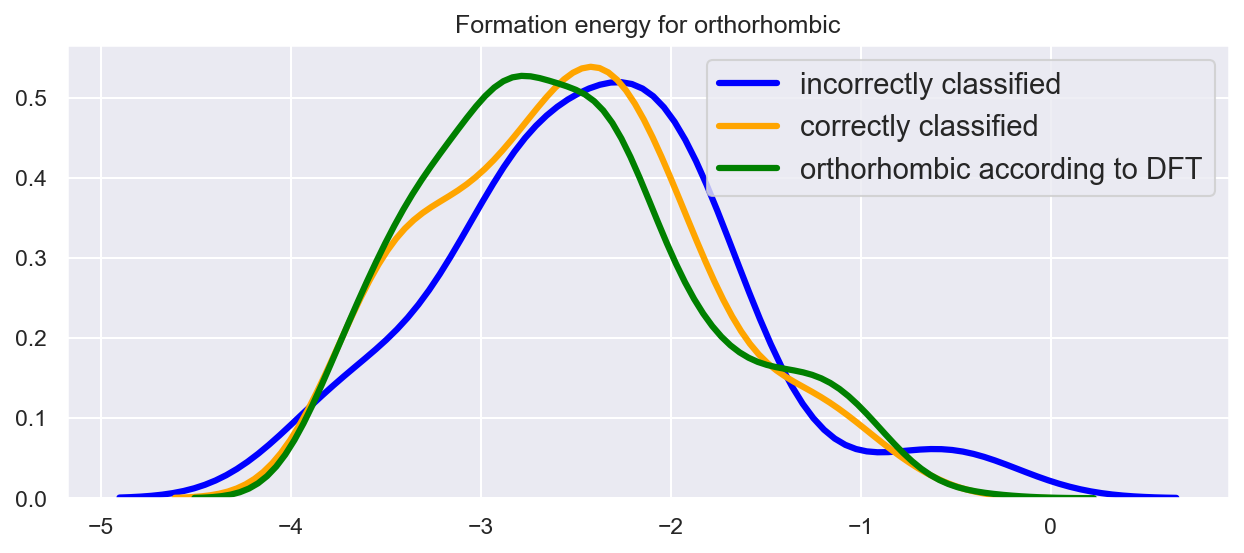

In [340]:
sns.kdeplot(revised_misclassified_ortho['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_ortho['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(ortho_form['Formation energy [eV/atom]'],legend=False,color='green')
plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','orthorhombic according to DFT'],fontsize='14')
#plt.savefig('revised orthorhombic formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for orthorhombic')

Text(0.5, 1.0, 'Formation energy for tetragonal')

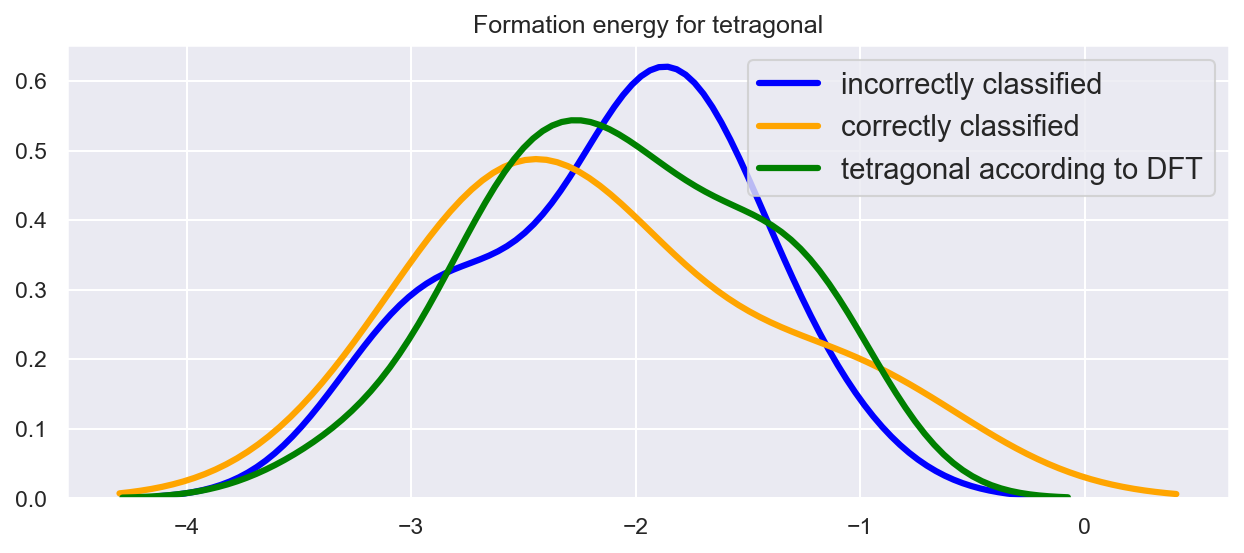

In [339]:
sns.kdeplot(revised_misclassified_tetra['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_tetra['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(tetra_form['Formation energy [eV/atom]'],legend=False,color='green')
plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','tetragonal according to DFT'],fontsize='14')
#plt.savefig('revised tetragonal formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for tetragonal')

Text(0.5, 1.0, 'Formation energy for cubic')

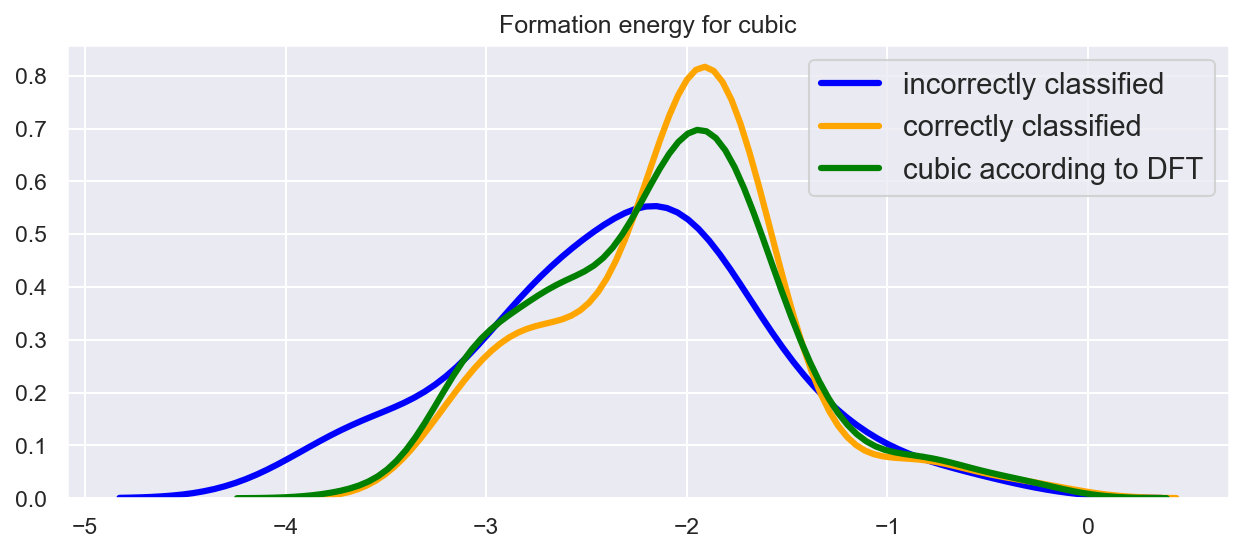

In [338]:
sns.kdeplot(revised_misclassified_cubic['Formation energy _eV/atom_'],legend=False,color='blue')
sns.kdeplot(correctly_cubic['Formation energy _eV/atom_'],legend=False,color='orange')
sns.kdeplot(cubic_form['Formation energy [eV/atom]'],legend=False,color='green')
plt.legend(loc='upper right', labels=['incorrectly classified','correctly classified','cubic according to DFT'],fontsize='14')
#plt.savefig('revised cubic formation energy.tif', bbox_inches='tight', pad_inches=2.0)
plt.title('Formation energy for cubic')

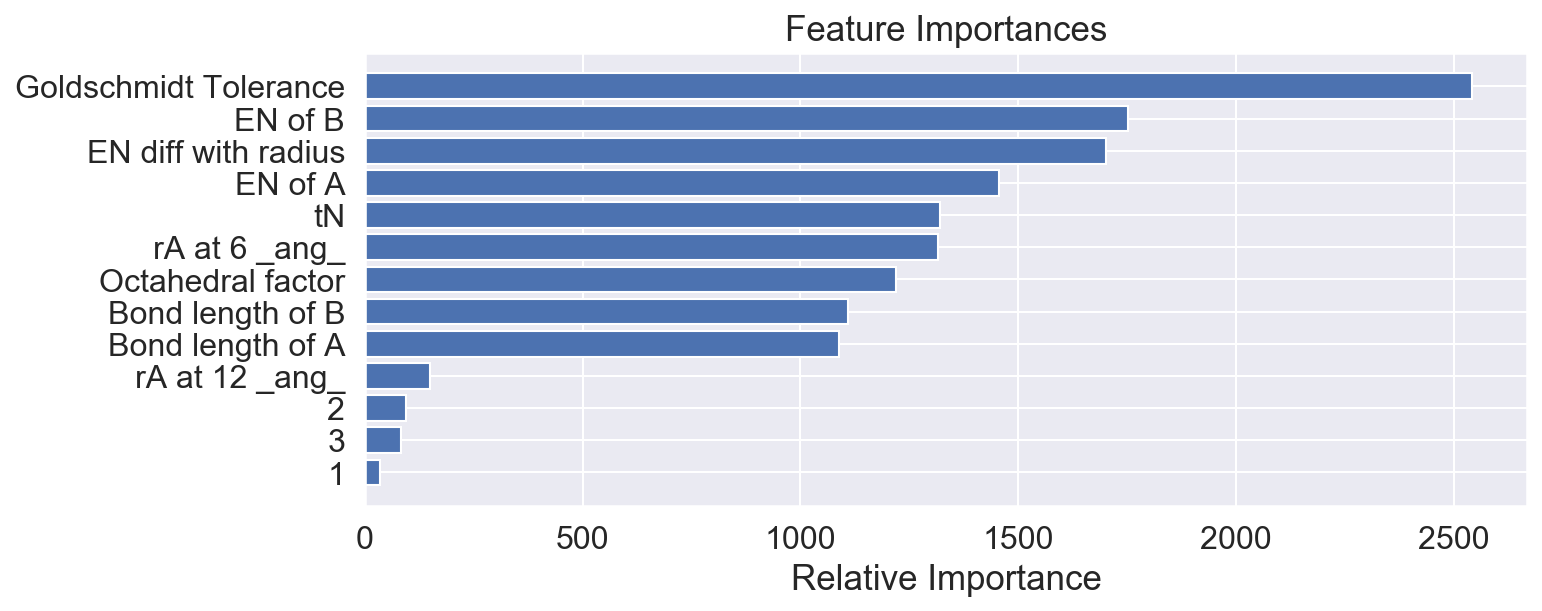

In [824]:
features = X_new.columns
importances = model.booster_.feature_importance(importance_type='gain')
indices = np.argsort(importances)


#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

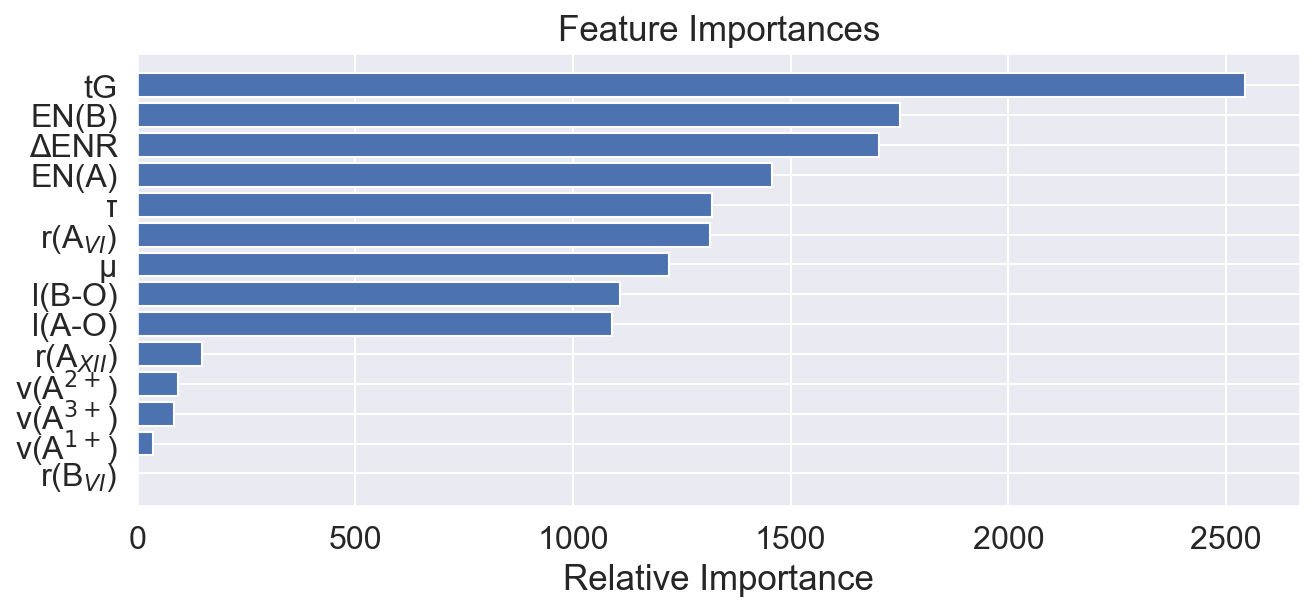

In [94]:
features = X_new.columns
importances = model.booster_.feature_importance(importance_type='gain')
indices = np.argsort(importances)

l=['r(B$_{VI}$)','v(A$^{1+}$)','v(A$^{3+}$)','v(A$^{2+}$)','r(A$_{XII}$)','l(A-O)','l(B-O)','μ','r(A$_{VI}$)','τ','EN(A)','ΔENR','EN(B)','tG']
#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(14), importances[indices], color='b', align='center')
plt.yticks(range(14), [i for i in l])
plt.xlabel('Relative Importance')
plt.savefig('relative_imp with rB.tif', bbox_inches='tight', pad_inches=2.0)
plt.show()


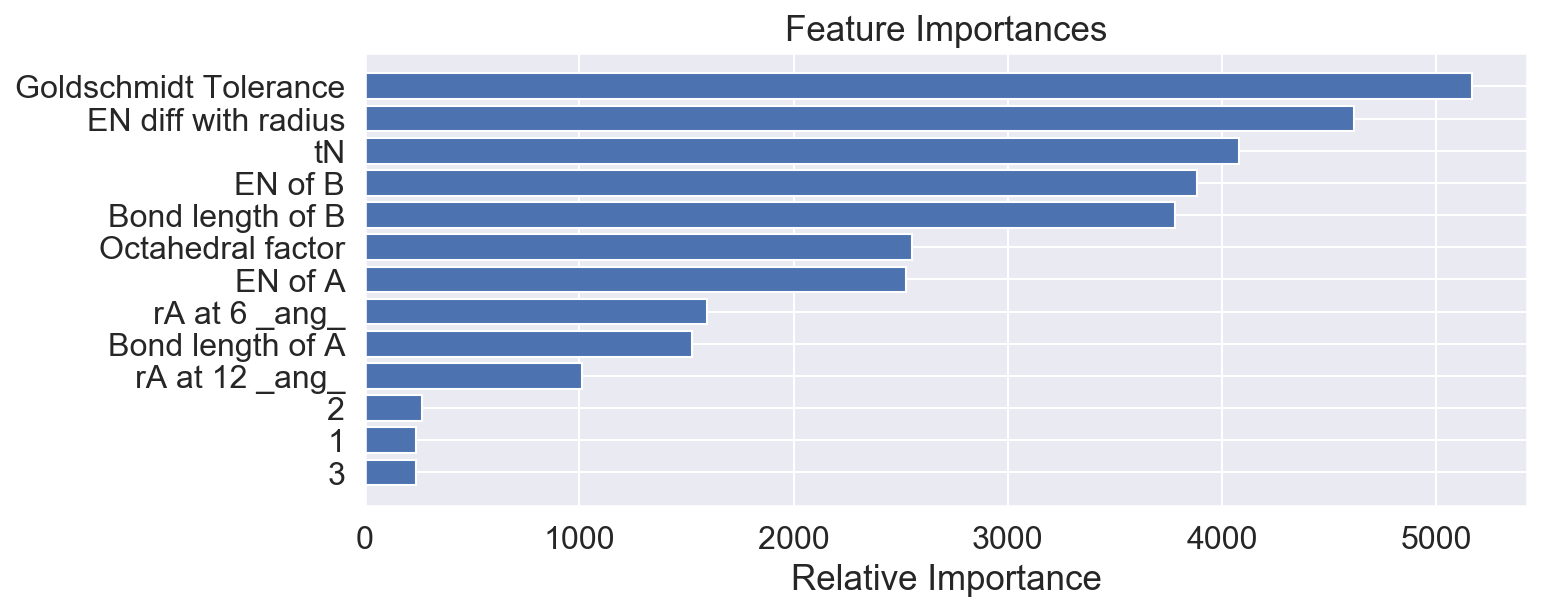

In [113]:
features = X_new.columns
importances=model.booster_.feature_importance(importance_type='split')
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [183]:
# acc= 0.7889087656529516
#When we did not take valencies into account and took 3430 datapoints
#acc=0.7632508833922261

#On dropping rA at 6
#acc=0.7817531305903399

#On dropping 4 and 5
#acc=0.7960644007155635

#tg .82-1.1 and using tN
#acc=0.7847533632286996

#When using tN less than 4.18
#acc falls to 73%

## When using gain for feature importance

In [184]:
# Goldschmidt Tolerance
# EN diff with radius
# EN of A
# EN of B
# tN

## When using split for feature importance

In [97]:
# EN diff with radius
# Goldschmidt Tolerance
# Bond Length of B
# EN of B
# EN of A

## Using Plotly to visualize clusters

In [103]:
#import plotly
#import plotly.express as px

In [121]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['tN'],color=categorical['Lowest distortion'])
#ig.show()

In [122]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [123]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of A'],color=categorical['Lowest distortion'])
#fig.show()

In [124]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of B'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [125]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of A'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [126]:
#fig = px.scatter_3d(x=wp1['EN of B'], y=wp1['Goldschmidt Tolerance'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [127]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['Goldschmidt Tolerance'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [128]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['EN of B'],z=wp1['Bond length of B'],color=categorical['Lowest distortion'])
#fig.show()

In [129]:
#fig = px.scatter_3d(x=wp1['EN of A'], y=wp1['Goldschmidt Tolerance'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [130]:
#fig = px.scatter_3d(x=wp1['EN diff with radius'], y=wp1['EN of A'],z=wp1['EN of B'],color=categorical['Lowest distortion'])
#fig.show()

In [109]:
#truedf=wp1[wp1['In literature']==True]

In [110]:
#true_categorical=categorical[categorical['In literature']==True]

In [111]:
#categorical

In [112]:
#true_categorical

In [113]:
#fig = px.scatter_3d(x=truedf['EN diff with radius'], y=truedf['EN of A'],z=truedf['EN of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [114]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['Goldschmidt Tolerance'],z=truedf['EN of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [115]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['EN of B'],z=truedf['Bond length of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [116]:
#fig = px.scatter_3d(x=truedf['EN of A'], y=truedf['Goldschmidt Tolerance'],z=truedf['Bond length of B'],color=true_categorical['Lowest distortion'])
#fig.show()

In [115]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_new)
#shap.summary_plot(shap_values, X_new)

## SHAP summary plot for each crystal structure

In [116]:
#Cubic

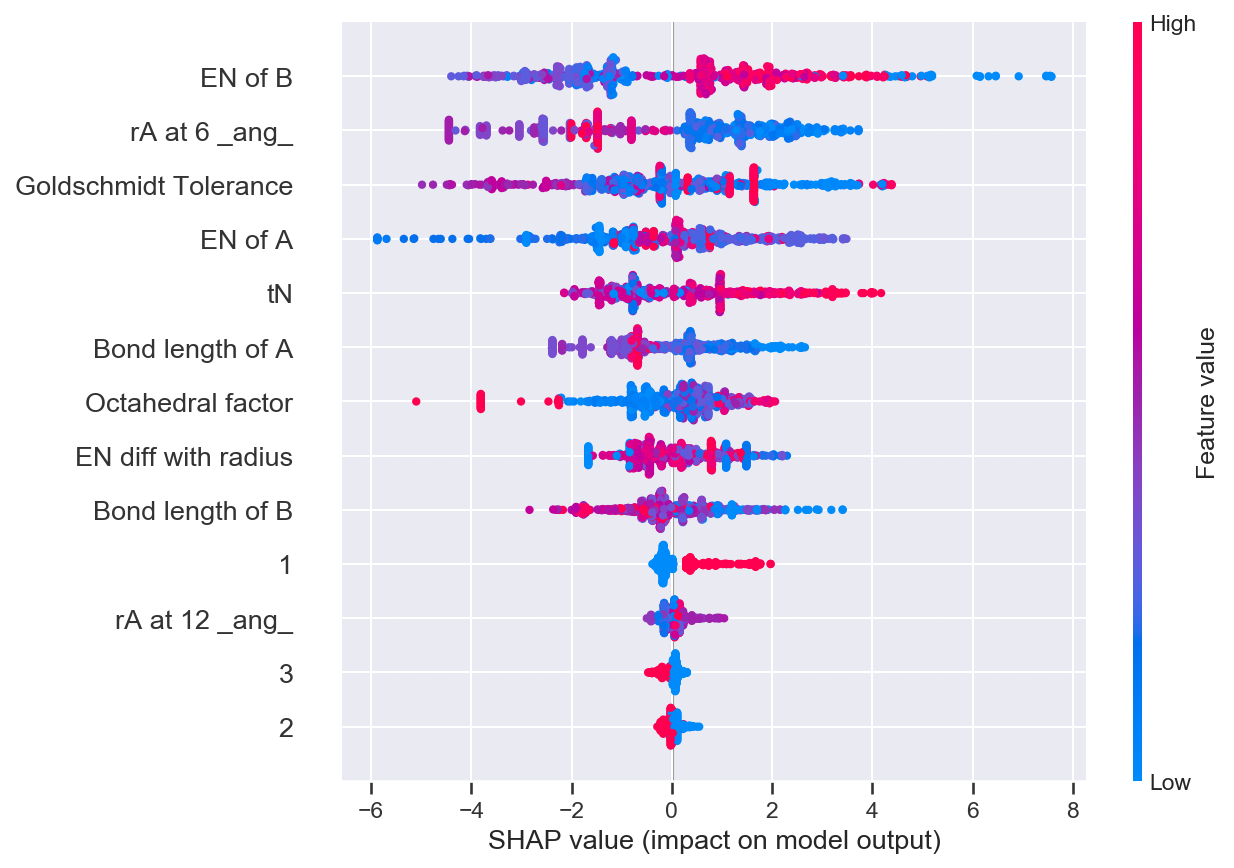

In [117]:
shap.summary_plot(shap_values[0], X_new)
#plt.savefig('cubic.tif', bbox_inches='tight', pad_inches=1.0)

In [313]:
# Orthorhombic

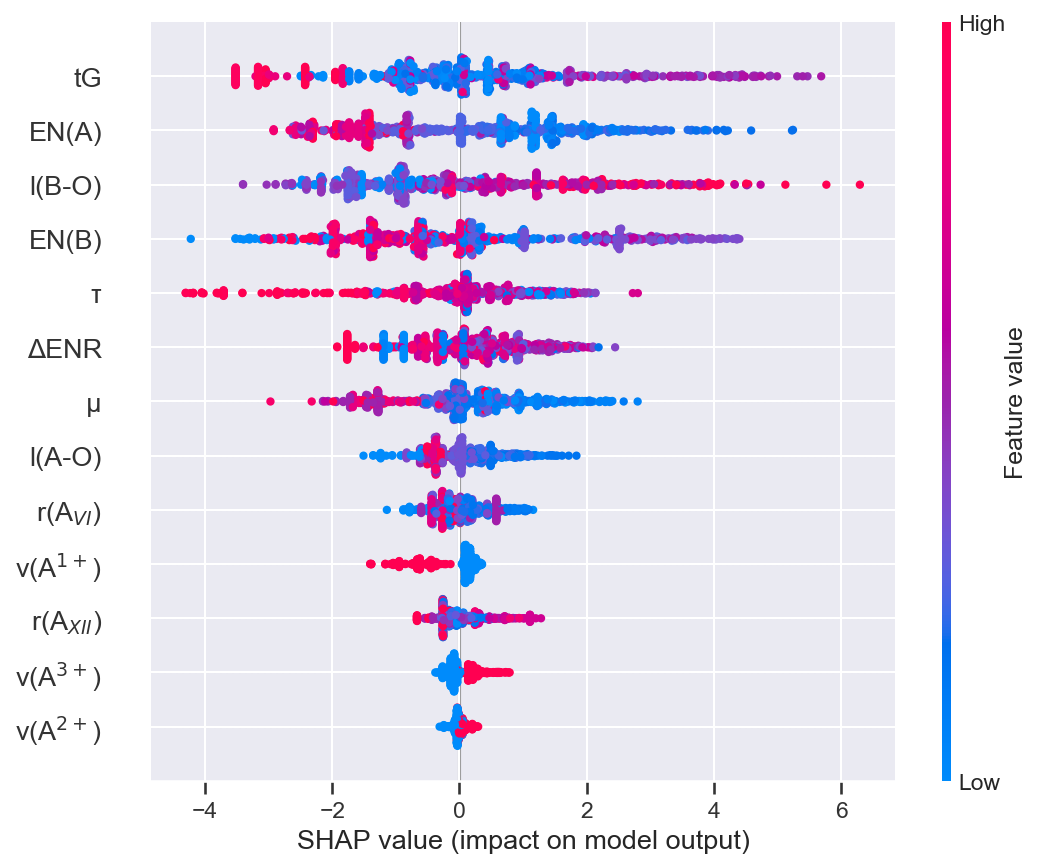

In [314]:
shap.summary_plot(shap_values[1], X_new,show=False)
plt.savefig('orthorhombic.tif', bbox_inches='tight', pad_inches=1.0)

In [315]:
# Rhombohedral

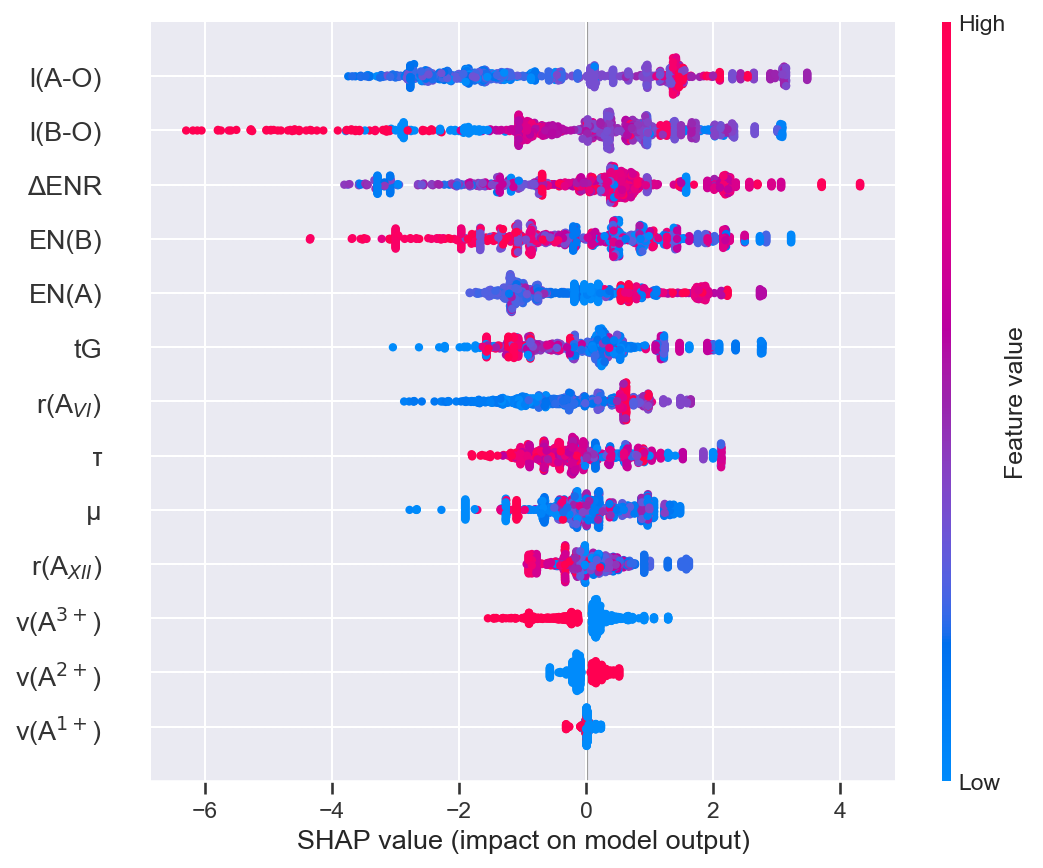

In [316]:
shap.summary_plot(shap_values[2], X_new, show=False)
plt.savefig('rhombohedral.tif', bbox_inches='tight', pad_inches=1.0)

In [317]:
# Tetragonal

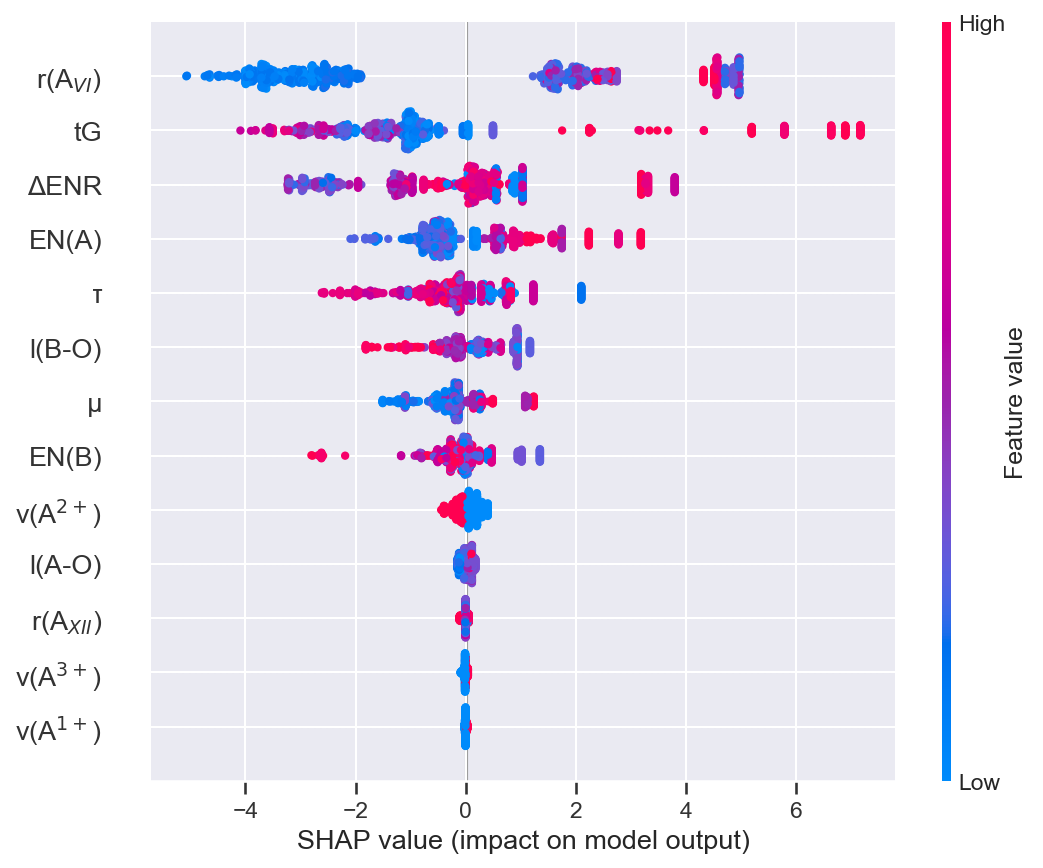

In [318]:
shap.summary_plot(shap_values[3], X_new,show=False)
plt.savefig('tetragonal.tif', bbox_inches='tight', pad_inches=1.0)

## SHAP dependence graph for top variables

### For Cubic

In [136]:
#shap.dependence_plot('EN diff with radius', shap_values[0], X_new)

In [137]:
#shap.dependence_plot('EN of A', shap_values[0], X_new)

In [138]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[0], X_new)

In [139]:
#shap.dependence_plot('EN of B', shap_values[0], X_new)

In [140]:
#shap.dependence_plot('Bond length of B', shap_values[0], X_new)

## For Orthorhombic

In [141]:
#shap.dependence_plot('EN diff with radius', shap_values[1], X_new)

In [142]:
#shap.dependence_plot('EN of A', shap_values[1], X_new)

In [144]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[1], X_new)

In [145]:
#shap.dependence_plot('EN of B', shap_values[1], X_new)

In [146]:
#shap.dependence_plot('Bond length of B', shap_values[1], X_new)

## For Rhombohedral

In [147]:
#shap.dependence_plot('EN diff with radius', shap_values[2], X_new)

In [148]:
#shap.dependence_plot('EN of A', shap_values[2], X_new)

In [149]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[2], X_new)

In [150]:
#shap.dependence_plot('EN of B', shap_values[2], X_new)

In [151]:
#shap.dependence_plot('Bond length of B', shap_values[2], X_new)

## For Tetragonal

In [152]:
#shap.dependence_plot('EN diff with radius', shap_values[3], X_new)

In [153]:
#shap.dependence_plot('EN of A', shap_values[3], X_new)

In [154]:
#shap.dependence_plot('Goldschmidt Tolerance', shap_values[3], X_new)

In [155]:
#shap.dependence_plot('EN of B', shap_values[3], X_new)

In [156]:
#shap.dependence_plot('Bond length of B', shap_values[3], X_new)